In [1831]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os, sys, warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)
plt.rc('figure', figsize=(10, 6))

In [1833]:
df=pd.read_csv('ncr_ride_bookings.csv')

In [1835]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [1837]:
df.shape

(150000, 21)

In [1839]:
#Change Column names to lower case & replace space with underscore.

df.columns = df.columns.str.lower().str.replace(" ", "_")

In [1841]:
df.head()

,date,time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,cancelled_rides_by_customer,reason_for_cancelling_by_customer,cancelled_rides_by_driver,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [1843]:
#Renaming reason_for_cancelling_by_customer as customer_cancellation_reason

df=df.rename(columns={'reason_for_cancelling_by_customer' : 'customer_cancellation_reason' })

In [1845]:
df.head()

,date,time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,cancelled_rides_by_customer,customer_cancellation_reason,cancelled_rides_by_driver,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [1847]:
#Drop Apostrophe from booking_id and customer_id

df['booking_id'] = df['booking_id'].str.replace(r"[^a-zA-Z0-9 ]", "", regex=True)
df['customer_id'] = df['customer_id'].str.replace(r"[^a-zA-Z0-9 ]", "", regex=True)

In [1849]:
df.head()

,date,time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,cancelled_rides_by_customer,customer_cancellation_reason,cancelled_rides_by_driver,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method
0,2024-03-23,12:29:38,CNR5884300,No Driver Found,CID1982111,eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,CNR1326809,Incomplete,CID4604802,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,CNR8494506,Completed,CID9202816,Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,CNR8906825,Completed,CID2610914,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,CNR1950162,Completed,CID9933542,Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [1851]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          150000 non-null  object 
 1   time                          150000 non-null  object 
 2   booking_id                    150000 non-null  object 
 3   booking_status                150000 non-null  object 
 4   customer_id                   150000 non-null  object 
 5   vehicle_type                  150000 non-null  object 
 6   pickup_location               150000 non-null  object 
 7   drop_location                 150000 non-null  object 
 8   avg_vtat                      139500 non-null  float64
 9   avg_ctat                      102000 non-null  float64
 10  cancelled_rides_by_customer   10500 non-null   float64
 11  customer_cancellation_reason  10500 non-null   object 
 12  cancelled_rides_by_driver     27000 non-null

In [1853]:
#Merge date and time columns to create a new date_time column and change the dtype to datetime

df['date_time']= pd.to_datetime(df['date']+' '+df['time'])
# Dropping the original first two columns
df = df.drop(df.columns[[0, 1]],axis=1) #(axis=0 row, axis=1 columns)
# Reordering columns to get merged column first
cols = ['date_time'] + [col for col in df.columns if col != 'date_time']
df=df[cols]

In [1855]:
df.head()

,date_time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,cancelled_rides_by_customer,customer_cancellation_reason,cancelled_rides_by_driver,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method
0,2024-03-23 12:29:38,CNR5884300,No Driver Found,CID1982111,eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29 18:01:39,CNR1326809,Incomplete,CID4604802,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23 08:56:10,CNR8494506,Completed,CID9202816,Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21 17:17:25,CNR8906825,Completed,CID2610914,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16 22:08:00,CNR1950162,Completed,CID9933542,Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [1857]:
# Extract datetime features
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.day_name()
df['month'] = df['date_time'].dt.month
#df['IsWeekend'] = df['date_time'].dt.weekday >= 5

In [1859]:
#Handling null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date_time                     150000 non-null  datetime64[ns]
 1   booking_id                    150000 non-null  object        
 2   booking_status                150000 non-null  object        
 3   customer_id                   150000 non-null  object        
 4   vehicle_type                  150000 non-null  object        
 5   pickup_location               150000 non-null  object        
 6   drop_location                 150000 non-null  object        
 7   avg_vtat                      139500 non-null  float64       
 8   avg_ctat                      102000 non-null  float64       
 9   cancelled_rides_by_customer   10500 non-null   float64       
 10  customer_cancellation_reason  10500 non-null   object        
 11  cancelled_rid

In [1861]:
df.duplicated().sum()

0

In [1863]:
df.isnull().sum()

date_time                            0
booking_id                           0
booking_status                       0
customer_id                          0
vehicle_type                         0
pickup_location                      0
drop_location                        0
avg_vtat                         10500
avg_ctat                         48000
cancelled_rides_by_customer     139500
customer_cancellation_reason    139500
cancelled_rides_by_driver       123000
driver_cancellation_reason      123000
incomplete_rides                141000
incomplete_rides_reason         141000
booking_value                    48000
ride_distance                    48000
driver_ratings                   57000
customer_rating                  57000
payment_method                   48000
hour                                 0
day_of_week                          0
month                                0
dtype: int64

In [1865]:
df['cancelled_rides_by_customer'].unique()

array([nan,  1.])

In [1867]:
df['cancelled_rides_by_driver'].unique()

array([nan,  1.])

In [1869]:
df['incomplete_rides'].unique()

array([nan,  1.])

In [1871]:
#Handling null values

df['customer_cancellation_reason'] = df['customer_cancellation_reason'].fillna('NA')
df['driver_cancellation_reason'] = df['driver_cancellation_reason'].fillna('NA')
df['incomplete_rides_reason'] = df['incomplete_rides_reason'].fillna('NA')
df['payment_method'] = df['payment_method'].fillna('Others')

df['avg_vtat'] = df['avg_vtat'].fillna(0)
df['avg_ctat'] = df['avg_ctat'].fillna(0)
df['cancelled_rides_by_customer'] = df['cancelled_rides_by_customer'].fillna(0)
df['cancelled_rides_by_driver'] = df['cancelled_rides_by_driver'].fillna(0)
df['incomplete_rides'] = df['incomplete_rides'].fillna(0)
df['booking_value'] = df['booking_value'].fillna(0)
df['ride_distance'] = df['ride_distance'].fillna(0)
df['driver_ratings'] = df['driver_ratings'].fillna(0)
df['customer_rating'] = df['customer_rating'].fillna(0)

In [1873]:
df.isnull().sum()

date_time                       0
booking_id                      0
booking_status                  0
customer_id                     0
vehicle_type                    0
pickup_location                 0
drop_location                   0
avg_vtat                        0
avg_ctat                        0
cancelled_rides_by_customer     0
customer_cancellation_reason    0
cancelled_rides_by_driver       0
driver_cancellation_reason      0
incomplete_rides                0
incomplete_rides_reason         0
booking_value                   0
ride_distance                   0
driver_ratings                  0
customer_rating                 0
payment_method                  0
hour                            0
day_of_week                     0
month                           0
dtype: int64

In [1875]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date_time                     150000 non-null  datetime64[ns]
 1   booking_id                    150000 non-null  object        
 2   booking_status                150000 non-null  object        
 3   customer_id                   150000 non-null  object        
 4   vehicle_type                  150000 non-null  object        
 5   pickup_location               150000 non-null  object        
 6   drop_location                 150000 non-null  object        
 7   avg_vtat                      150000 non-null  float64       
 8   avg_ctat                      150000 non-null  float64       
 9   cancelled_rides_by_customer   150000 non-null  float64       
 10  customer_cancellation_reason  150000 non-null  object        
 11  cancelled_rid

In [1877]:
df['cancelled_rides_by_customer']=df['cancelled_rides_by_customer'].astype(int)
df['cancelled_rides_by_driver']=df['cancelled_rides_by_driver'].astype(int)
df['incomplete_rides']=df['incomplete_rides'].astype(int)

In [1879]:
df['cancelled_rides_by_customer'].unique()

array([0, 1])

In [1881]:
df['cancelled_rides_by_driver'].unique()

array([0, 1])

In [1883]:
df['incomplete_rides'].unique()

array([0, 1])

In [1885]:
df.head()

,date_time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,cancelled_rides_by_customer,customer_cancellation_reason,cancelled_rides_by_driver,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method,hour,day_of_week,month
0,2024-03-23 12:29:38,CNR5884300,No Driver Found,CID1982111,eBike,Palam Vihar,Jhilmil,0.0,0.0,0,NA,0,NA,0,NA,0.0,0.00,0.0,0.0,Others,12,Saturday,3
1,2024-11-29 18:01:39,CNR1326809,Incomplete,CID4604802,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,0,NA,0,NA,1,Vehicle Breakdown,237.0,5.73,0.0,0.0,UPI,18,Friday,11
2,2024-08-23 08:56:10,CNR8494506,Completed,CID9202816,Auto,Khandsa,Malviya Nagar,13.4,25.8,0,NA,0,NA,0,NA,627.0,13.58,4.9,4.9,Debit Card,8,Friday,8
3,2024-10-21 17:17:25,CNR8906825,Completed,CID2610914,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,0,NA,0,NA,0,NA,416.0,34.02,4.6,5.0,UPI,17,Monday,10
4,2024-09-16 22:08:00,CNR1950162,Completed,CID9933542,Bike,Ghitorni Village,Khan Market,5.3,19.6,0,NA,0,NA,0,NA,737.0,48.21,4.1,4.3,UPI,22,Monday,9


Data Cleaning/Handling:

1. To avoid case sensitivity and space issues, we changed all columns names to lower case, and replaced space with underscore.
2. To simplify column names we tried to follow smaller names convention. We renamed reason_for_cancelling_by_customer as    customer_cancellation_reason.
3. We dropped Apostrophe from booking_id and customer_id to make data usage more convenient.
4. We merged date and time columns to create a new column date_time column and changed the data type to datetime.
5. Extracted features such as hour,day_of_week,month from date_time column which are the key features during analysis.
6. Checked for missing and handled/removed as required.
7. Changed the data type cancelled_rides_by_customer, cancelled_rides_by_driver and incomplete_rides to int type.


Exploratory Data Analysis

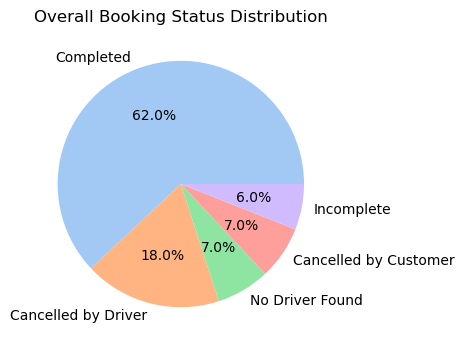

In [1893]:
#Booking status distribution
plt.figure(figsize=(8,4))

colors = sns.color_palette("pastel")[0:5]
status_counts = df['booking_status'].value_counts()
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%',colors=colors)
plt.title('Overall Booking Status Distribution')
plt.show()

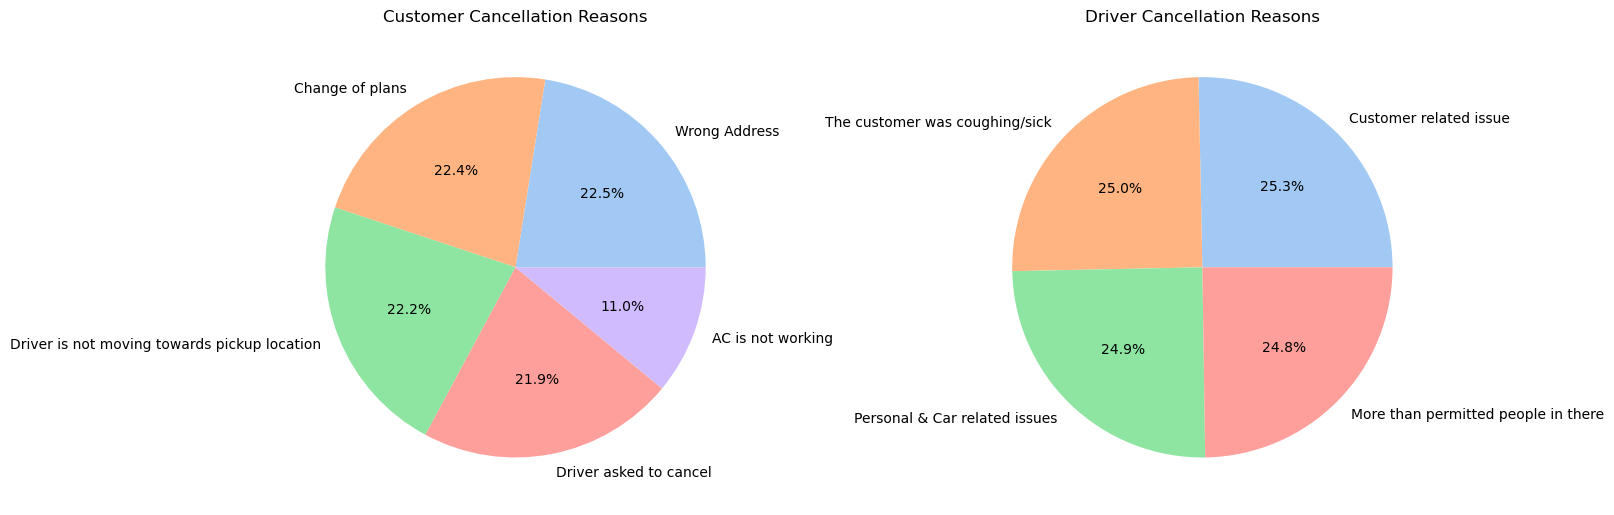

In [1891]:
#Top reason for customer/driver cancellation 

plt.figure(figsize=(16,14))

cust_cancelled_df=df[df['booking_status']=='Cancelled by Customer']
driver_cancelled_df=df[df['booking_status']=='Cancelled by Driver']

plt.subplot(1,2,1)
colors = sns.color_palette("pastel")[0:5]
reason_counts = cust_cancelled_df['customer_cancellation_reason'].value_counts()
plt.pie(reason_counts.values, labels=reason_counts.index, autopct='%1.1f%%',colors=colors)
plt.title('Customer Cancellation Reasons')

plt.subplot(1,2,2)
colors = sns.color_palette("pastel")[0:4]
reason_counts = driver_cancelled_df['driver_cancellation_reason'].value_counts()
plt.pie(reason_counts.values, labels=reason_counts.index, autopct='%1.1f%%',colors=colors)
plt.title('Driver Cancellation Reasons')

plt.tight_layout()
plt.show()

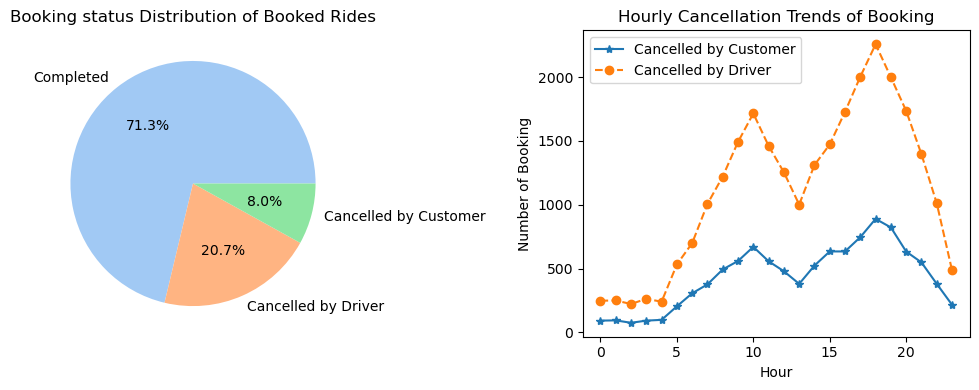

In [1897]:
#Booking vs cancellation by driver and customer on Booked Rides
plt.figure(figsize=(10,4))

#Booking Status Distribution of Booked Rides

plt.subplot(1,2,1)
#(Booked df - includes 'Completed', 'Cancelled by customer' & 'Cancelled by driver' status.)
#(Incomplete status is vague, Driver not found status implies booking is not completed.)
booked_df=df[df['booking_status'].isin(['Completed','Cancelled by Customer','Cancelled by Driver'])]
colors = sns.color_palette("pastel")[0:3]
status_counts =booked_df['booking_status'].value_counts()
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%',colors=colors)
plt.title('Booking status Distribution of Booked Rides')

#Number of rides Cancelled by Driver vs Cancelled by Customer by Hour of Day

plt.subplot(1,2,2)
cust_cancelled_hourly=booked_df[booked_df['booking_status']=='Cancelled by Customer'].groupby('hour').size()
driver_cancelled_hourly=booked_df[booked_df['booking_status']=='Cancelled by Driver'].groupby('hour').size()
plt.plot(cust_cancelled_hourly.index,cust_cancelled_hourly.values,marker='*',label='Cancelled by Customer',linestyle='-')
plt.plot(driver_cancelled_hourly.index,driver_cancelled_hourly.values,marker='o',label='Cancelled by Driver',linestyle='--')
plt.title('Hourly Cancellation Trends of Booking')
plt.xlabel('Hour')
plt.ylabel('Number of Booking')

plt.legend()
plt.tight_layout()
plt.show()

In [1975]:
#Customer cancelled rides - Top 5 Hourly count- Booked Rides
booked_df[booked_df['booking_status']=='Cancelled by Customer'].groupby('hour').size().sort_values(ascending=False).head()

hour
18    889
19    822
17    746
10    670
16    634
dtype: int64

In [1977]:
#Driver cancelled rides - Top 5 Hourly count - Booked Rides
booked_df[booked_df['booking_status']=='Cancelled by Driver'].groupby('hour').size().sort_values(ascending=False).head()

hour
18    2257
17    2003
19    1998
20    1735
16    1728
dtype: int64

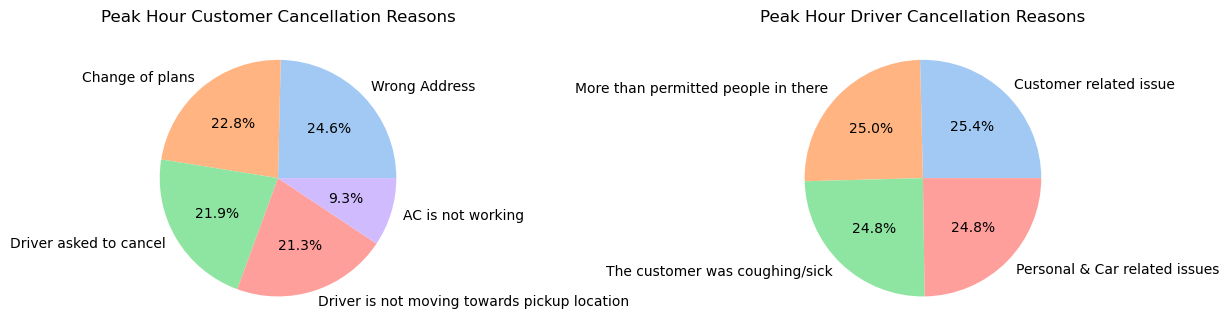

In [1937]:
#Peak Hour Cancellation Reason by Customer and Driver Trend
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
colors = sns.color_palette("pastel")[0:5]
cust_peak_cancel_hour=(booked_df[booked_df['booking_status']=='Cancelled by Customer'].\
                         groupby('hour').size().idxmax())
cust_peak_cancels = booked_df[(booked_df['booking_status'] == 'Cancelled by Customer') & \
                                (booked_df['hour'] == cust_peak_cancel_hour)]
c_reason_counts_peak = cust_peak_cancels['customer_cancellation_reason'].value_counts()
plt.pie(c_reason_counts_peak.values, labels=c_reason_counts_peak.index, autopct='%1.1f%%',colors=colors)
plt.title('Peak Hour Customer Cancellation Reasons')


plt.subplot(1,2,2)
colors = sns.color_palette("pastel")[0:4]
driver_peak_cancel_hour=(booked_df[booked_df['booking_status']=='Cancelled by Driver'].\
                         groupby('hour').size().idxmax())
driver_peak_cancels = booked_df[(booked_df['booking_status'] == 'Cancelled by Driver') & \
                                (booked_df['hour'] == driver_peak_cancel_hour)]
d_reason_counts_peak = driver_peak_cancels['driver_cancellation_reason'].value_counts()
plt.pie(d_reason_counts_peak.values, labels=d_reason_counts_peak.index, autopct='%1.1f%%',colors=colors)
plt.title('Peak Hour Driver Cancellation Reasons')

plt.tight_layout()
plt.show()

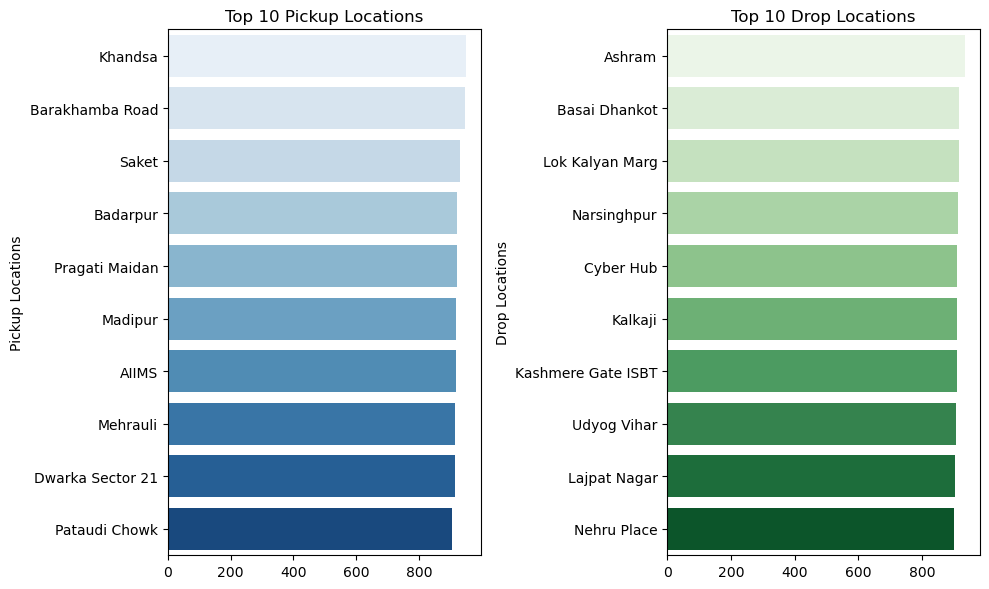

In [1899]:
#Top pickup and drop location on overall rides booking

top_pickups = df['pickup_location'].value_counts().head(10)
top_drops = df['drop_location'].value_counts().head(10)

plt.subplot(1,2,1)
sns.barplot(x=top_pickups.values,y=top_pickups.index,palette='Blues')
plt.title('Top 10 Pickup Locations')
plt.ylabel('Pickup Locations')

plt.subplot(1,2,2)
sns.barplot(x=top_drops.values,y=top_drops.index,palette='Greens')
plt.title('Top 10 Drop Locations')
plt.ylabel('Drop Locations')

plt.tight_layout()
plt.show()

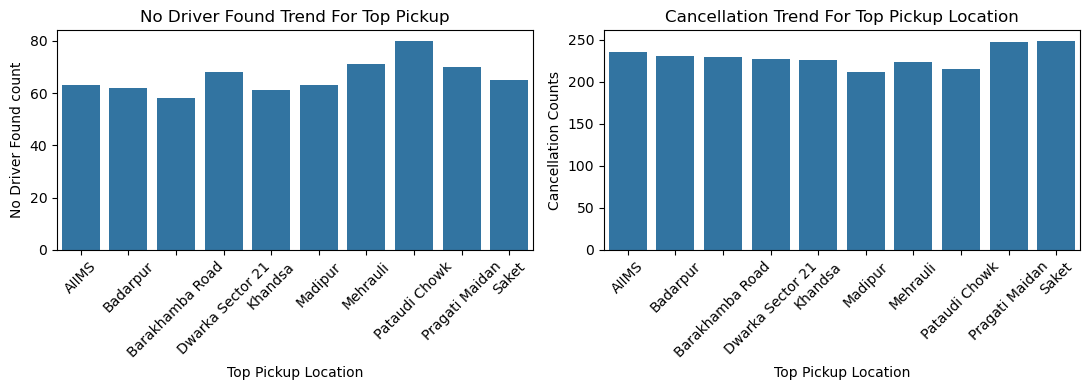

In [1901]:
#‘No driver found’ status at top pick up location on overall rides booking
plt.figure(figsize=(11,4))

plt.subplot(1,2,1)
top_pickup_loc = df.groupby('pickup_location').size().sort_values(ascending=False).head(10).index
df_top_pickup = df[df['pickup_location'].isin(top_pickup_loc)]
pickup_no_driver_counts=df_top_pickup[df_top_pickup['booking_status'] == 'No Driver Found'].groupby('pickup_location').size()

sns.barplot(x=pickup_no_driver_counts.index,y=pickup_no_driver_counts.values)
plt.title('No Driver Found Trend For Top Pickup')
plt.xlabel('Top Pickup Location')
plt.ylabel('No Driver Found count')
plt.tick_params(axis='x', rotation=45)

#Cancellation trend at top pick up location on overall rides booking
plt.subplot(1,2,2)
top_pickup_loc = df.groupby('pickup_location').size().sort_values(ascending=False).head(10).index
df_top_pickup = df[df['pickup_location'].isin(top_pickup_loc)]
pickup_cancelled_counts=df_top_pickup[df_top_pickup['booking_status'].isin(['Cancelled by Customer','Cancelled by Driver'])].\
groupby('pickup_location').size()

sns.barplot(x=pickup_cancelled_counts.index,y=pickup_cancelled_counts.values)
plt.title('Cancellation Trend For Top Pickup Location')
plt.xlabel('Top Pickup Location')
plt.ylabel('Cancellation Counts')
plt.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

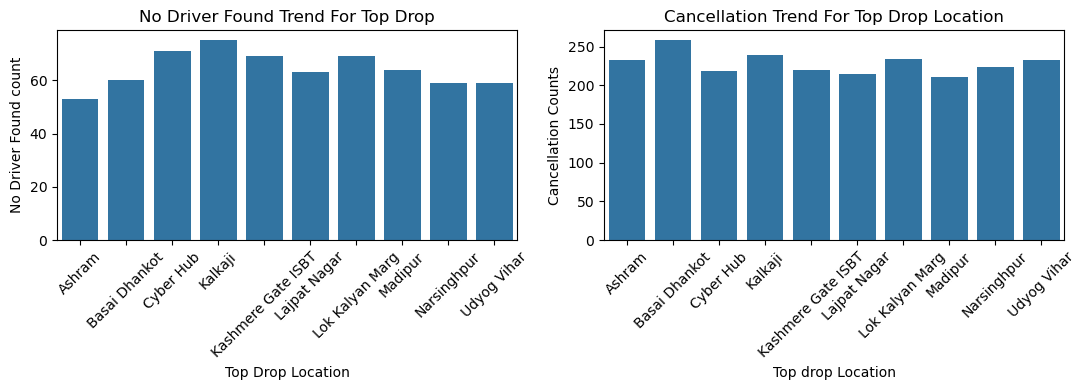

In [1903]:
#‘No driver found’ status at top drop locations on overall rides booking
plt.figure(figsize=(11,4))

plt.subplot(1,2,1)
top_drop_loc = df.groupby('drop_location').size().sort_values(ascending=False).head(10).index
df_top_drop = df[df['drop_location'].isin(top_drop_loc)]
drop_no_driver_counts=df_top_drop[df_top_drop['booking_status'] == 'No Driver Found'].groupby('drop_location').size()

sns.barplot(x=drop_no_driver_counts.index,y=drop_no_driver_counts.values)
plt.title('No Driver Found Trend For Top Drop')
plt.xlabel('Top Drop Location')
plt.ylabel('No Driver Found count')
plt.tick_params(axis='x', rotation=45)

#Cancellation trend at top drop location on overall rides booking
plt.subplot(1,2,2)
top_drop_loc = df.groupby('drop_location').size().sort_values(ascending=False).head(10).index
df_top_drop = df[df['drop_location'].isin(top_drop_loc)]
drop_cancelled_counts=df_top_drop[df_top_drop['booking_status'].isin(['Cancelled by Customer','Cancelled by Driver'])].\
groupby('drop_location').size()

sns.barplot(x=drop_cancelled_counts.index,y=drop_cancelled_counts.values)
plt.title('Cancellation Trend For Top Drop Location')
plt.xlabel('Top drop Location')
plt.ylabel('Cancellation Counts')
plt.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

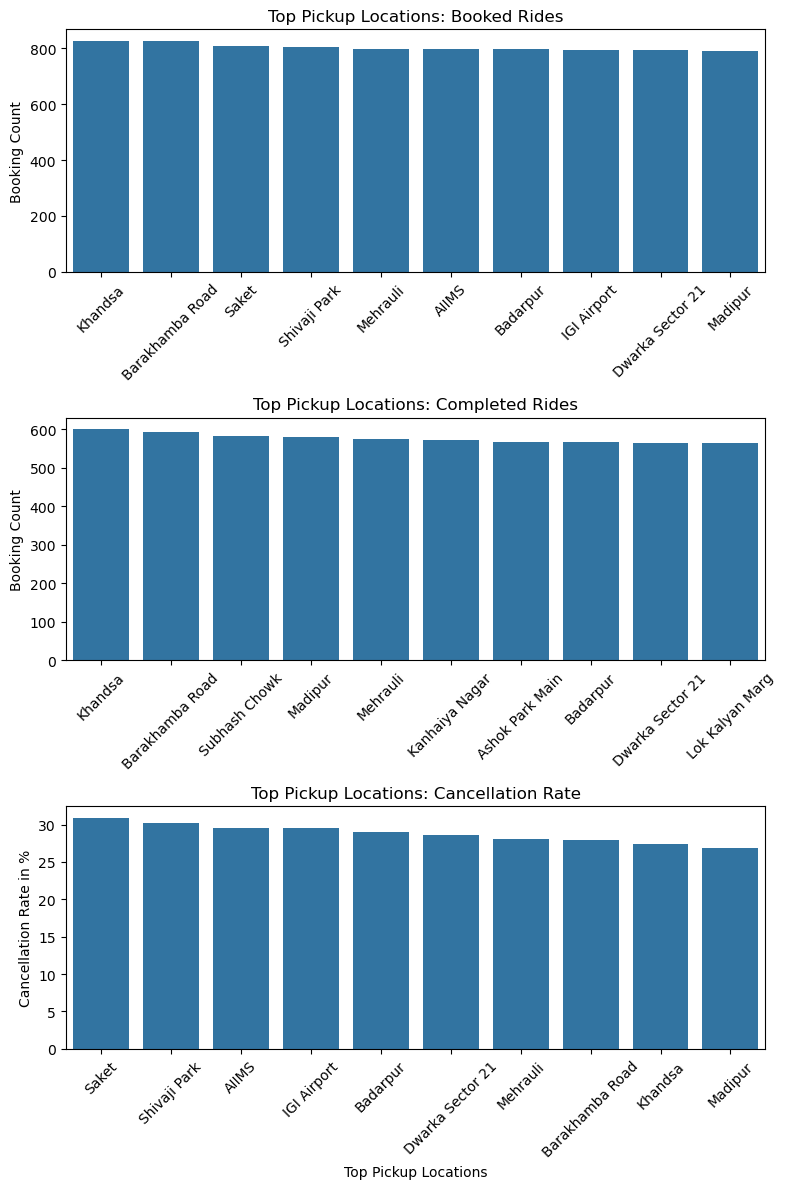

In [1905]:
#Top pickup location on completed booking and on overall booking comparison

#booked_df - includes completed,canclled by driver,cancelled by customer
plt.figure(figsize=(8,12))

#Top pickup locations on booked rides 
booked_df=df[df['booking_status'].isin(['Completed','Cancelled by Customer','Cancelled by Driver'])]

plt.subplot(3,1,1)
overall_top_pickup=booked_df['pickup_location'].value_counts().head(10)
sns.barplot(x=overall_top_pickup.index,y=overall_top_pickup.values)
plt.title("Top Pickup Locations: Booked Rides")
plt.xlabel('')
plt.ylabel('Booking Count')
plt.tick_params(axis='x', rotation=45)

#top pickup locations on completed rides

plt.subplot(3,1,2)
completed_top_pickup = booked_df[booked_df['booking_status'] == 'Completed']['pickup_location'].value_counts().head(10)
sns.barplot(x=completed_top_pickup.index,y=completed_top_pickup.values)
plt.title("Top Pickup Locations: Completed Rides")
plt.xlabel('')
plt.ylabel('Booking Count')
plt.tick_params(axis='x', rotation=45)

#top pickup locations based on cancellation rate(booked rides)

plt.subplot(3,1,3)
booked_top_pickup=booked_df['pickup_location'].value_counts().head(10).index
booked_top_pickup_df = booked_df[booked_df['pickup_location'].isin(booked_top_pickup)]
cancelled_top_loc=100*booked_top_pickup_df[booked_top_pickup_df['booking_status'] != 'Completed']['pickup_location'].value_counts()\
/booked_top_pickup_df['pickup_location'].value_counts()
cancelled_pct=cancelled_top_loc.sort_values(ascending=False).head(10)
sns.barplot(x=cancelled_pct.index,y=cancelled_pct.values)
plt.title("Top Pickup Locations: Cancellation Rate")
plt.xlabel('Top Pickup Locations')
plt.ylabel('Cancellation Rate in %')
plt.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [1909]:
#Cancellation Rate of Saket, Shivaji Park, AIIMS & IGI Airport

booked_top_pickup=booked_df['pickup_location'].value_counts().head(10).index
booked_top_pickup_df = booked_df[booked_df['pickup_location'].isin(booked_top_pickup)]
round((100*booked_top_pickup_df[booked_top_pickup_df['booking_status'] != 'Completed']['pickup_location'].value_counts()\
/booked_top_pickup_df['pickup_location'].value_counts()),2).sort_values(ascending=False).head(4)

pickup_location
Saket           30.89
Shivaji Park    30.22
AIIMS           29.57
IGI Airport     29.56
Name: count, dtype: float64

Cancellation Reasons at Saket,Shivaji park,AIIMS & IGI Airpot

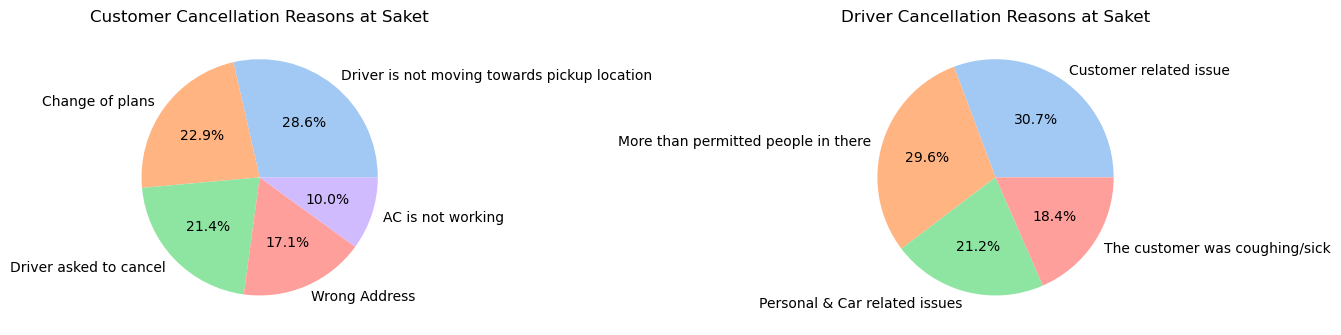

In [1911]:
#Cancellation Reasons at Saket
plt.figure(figsize=(13,13))

#Customer Cancellation Reasons at Saket
plt.subplot(1,2,1)
colors = sns.color_palette("pastel")[0:5]
cust_cancel_saket = booked_df[(booked_df['booking_status'] == 'Cancelled by Customer') & \
                                (booked_df['pickup_location'] == 'Saket')]['customer_cancellation_reason'].value_counts()
plt.pie(cust_cancel_saket.values, labels=cust_cancel_saket.index, autopct='%1.1f%%',colors=colors)
plt.title('Customer Cancellation Reasons at Saket')

#Driver Cancellation Reasons at Saket
plt.subplot(1,2,2)
colors = sns.color_palette("pastel")[0:4]
driver_cancel_saket = booked_df[(booked_df['booking_status'] == 'Cancelled by Driver') & \
                                (booked_df['pickup_location'] == 'Saket')]['driver_cancellation_reason'].value_counts()
plt.pie(driver_cancel_saket.values, labels=driver_cancel_saket.index, autopct='%1.1f%%',colors=colors)
plt.title('Driver Cancellation Reasons at Saket')

plt.tight_layout()
plt.show()

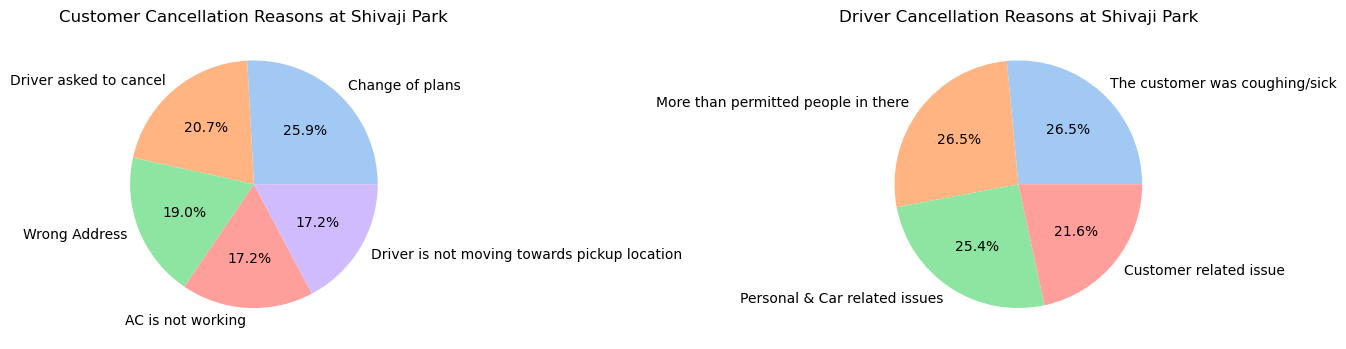

In [1917]:
#Cancellation Reasons at Shivaji Park
plt.figure(figsize=(13,8))

#Customer Cancellation Reasons at Shivaji Park
plt.subplot(1,2,1)
colors = sns.color_palette("pastel")[0:5]
cust_cancel_sp = booked_df[(booked_df['booking_status'] == 'Cancelled by Customer') & \
                                (booked_df['pickup_location'] == 'Shivaji Park')]['customer_cancellation_reason'].value_counts()
plt.pie(cust_cancel_sp.values, labels=cust_cancel_sp.index, autopct='%1.1f%%',colors=colors)
plt.title('Customer Cancellation Reasons at Shivaji Park')

#Driver Cancellation Reasons at Shivaji Park
plt.subplot(1,2,2)
colors = sns.color_palette("pastel")[0:4]
driver_cancel_sp = booked_df[(booked_df['booking_status'] == 'Cancelled by Driver') & \
                                (booked_df['pickup_location'] == 'Shivaji Park')]['driver_cancellation_reason'].value_counts()
plt.pie(driver_cancel_sp.values, labels=driver_cancel_sp.index, autopct='%1.1f%%',colors=colors)
plt.title('Driver Cancellation Reasons at Shivaji Park')

plt.tight_layout()
plt.show()

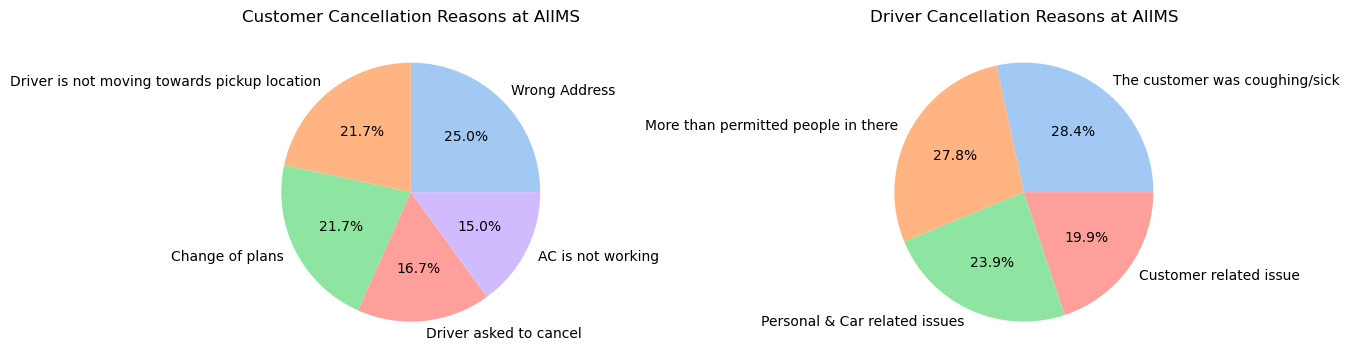

In [1915]:
#Cancellation Reasons at AIIMS
plt.figure(figsize=(13,8))

#Customer Cancellation Reasons at AIIMS
plt.subplot(1,2,1)
colors = sns.color_palette("pastel")[0:5]
cust_cancel_aiims = booked_df[(booked_df['booking_status'] == 'Cancelled by Customer') & \
                                (booked_df['pickup_location'] == 'AIIMS')]['customer_cancellation_reason'].value_counts()
plt.pie(cust_cancel_aiims.values, labels=cust_cancel_aiims.index, autopct='%1.1f%%',colors=colors)
plt.title('Customer Cancellation Reasons at AIIMS')

#Driver Cancellation Reasons at AIIMS
plt.subplot(1,2,2)
colors = sns.color_palette("pastel")[0:4]
driver_cancel_aiims = booked_df[(booked_df['booking_status'] == 'Cancelled by Driver') & \
                                (booked_df['pickup_location'] == 'AIIMS')]['driver_cancellation_reason'].value_counts()
plt.pie(driver_cancel_aiims.values, labels=driver_cancel_aiims.index, autopct='%1.1f%%',colors=colors)
plt.title('Driver Cancellation Reasons at AIIMS')

plt.tight_layout()
plt.show()

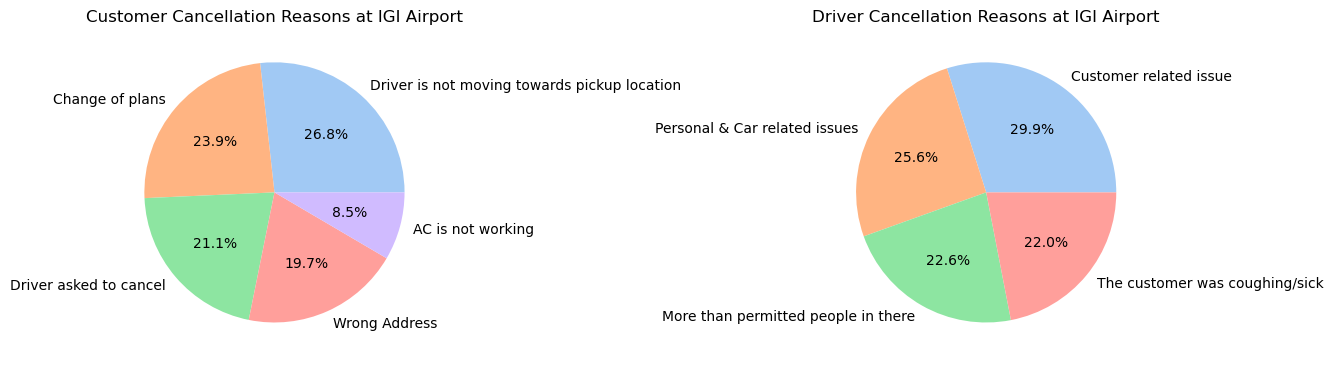

In [1919]:
#Cancellation Reasons at IGI Airport
plt.figure(figsize=(13,8))

#Customer Cancellation Reasons at IGI Airport
plt.subplot(1,2,1)
colors = sns.color_palette("pastel")[0:5]
cust_cancel_igi = booked_df[(booked_df['booking_status'] == 'Cancelled by Customer') & \
                                (booked_df['pickup_location'] == 'IGI Airport')]['customer_cancellation_reason'].value_counts()
plt.pie(cust_cancel_igi.values, labels=cust_cancel_igi.index, autopct='%1.1f%%',colors=colors)
plt.title('Customer Cancellation Reasons at IGI Airport')

#Driver Cancellation Reasons at IGI Airport
plt.subplot(1,2,2)
colors = sns.color_palette("pastel")[0:4]
driver_cancel_igi = booked_df[(booked_df['booking_status'] == 'Cancelled by Driver') & \
                                (booked_df['pickup_location'] == 'IGI Airport')]['driver_cancellation_reason'].value_counts()
plt.pie(driver_cancel_igi.values, labels=driver_cancel_igi.index, autopct='%1.1f%%',colors=colors)
plt.title('Driver Cancellation Reasons at IGI Airport')

plt.tight_layout()
plt.show()

In [1642]:
#Evaluating booking count,vtat,cancelled by driver and cancelled by customer count(booked rides)

booked_df=df[df['booking_status'].isin(['Completed','Cancelled by Customer','Cancelled by Driver'])]
loc_segment=booked_df.groupby('pickup_location').agg({
    'booking_id': 'count',
    'avg_vtat': 'mean',
    'cancelled_rides_by_driver': 'sum',
    'cancelled_rides_by_customer': 'sum'
}).rename(columns={'booking_id':'booking_count'}).reset_index()
loc_segment

,pickup_location,booking_count,avg_vtat,cancelled_rides_by_driver,cancelled_rides_by_customer
0,AIIMS,798,8.427820,176,60
1,Adarsh Nagar,737,8.587246,141,62
2,Akshardham,719,8.653686,170,78
3,Ambience Mall,761,8.810775,151,58
4,Anand Vihar,752,8.744548,142,57
...,...,...,...,...,...
171,Vidhan Sabha,712,8.698174,154,52
172,Vinobapuri,694,8.560663,176,68
173,Vishwavidyalaya,790,8.640000,169,67
174,Welcome,751,8.594940,132,65


In [1643]:
#Evaluating Cancellation Rate

loc_segment['cancellation_rate']=round(100*(loc_segment['cancelled_rides_by_driver']+\
                                            loc_segment['cancelled_rides_by_customer'])/loc_segment['booking_count'],2)

In [1644]:
loc_segment

,pickup_location,booking_count,avg_vtat,cancelled_rides_by_driver,cancelled_rides_by_customer,cancellation_rate
0,AIIMS,798,8.427820,176,60,29.57
1,Adarsh Nagar,737,8.587246,141,62,27.54
2,Akshardham,719,8.653686,170,78,34.49
3,Ambience Mall,761,8.810775,151,58,27.46
4,Anand Vihar,752,8.744548,142,57,26.46
...,...,...,...,...,...,...
171,Vidhan Sabha,712,8.698174,154,52,28.93
172,Vinobapuri,694,8.560663,176,68,35.16
173,Vishwavidyalaya,790,8.640000,169,67,29.87
174,Welcome,751,8.594940,132,65,26.23


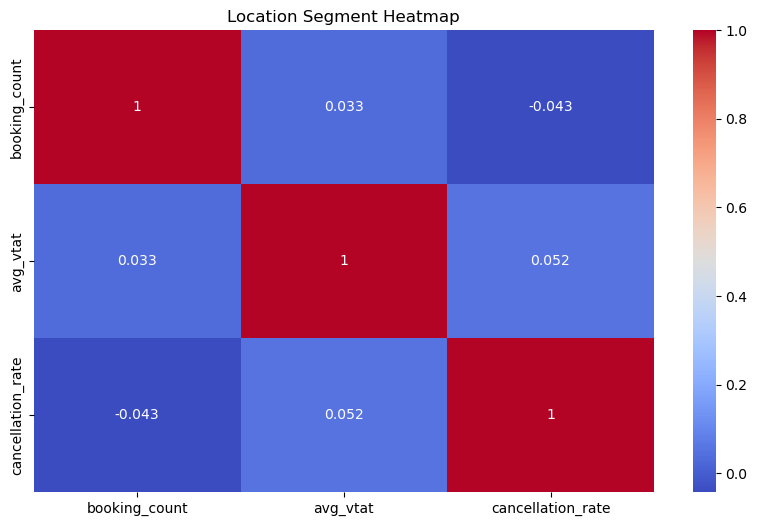

In [1645]:
#Analysing correlation between booking count, average vtat & cancellation rate

corr=loc_segment[['booking_count','avg_vtat','cancellation_rate']].corr()
sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.title('Location Segment Heatmap')
plt.show()

In [1646]:
#Top locations based on booking count - booked rides

loc_segment[['pickup_location','booking_count','avg_vtat','cancellation_rate']].sort_values(by='booking_count',ascending=False).\
head(10).reset_index(drop=True)

,pickup_location,booking_count,avg_vtat,cancellation_rate
0,Khandsa,826,8.580266,27.36
1,Barakhamba Road,824,8.648665,27.91
2,Saket,806,8.805955,30.89
3,Shivaji Park,804,8.725373,30.22
4,AIIMS,798,8.427820,29.57
5,Badarpur,798,8.950752,28.95
6,Mehrauli,798,8.356140,28.07
7,IGI Airport,795,8.793208,29.56
8,Dwarka Sector 21,792,8.478409,28.66
9,Madipur,791,8.488116,26.80


In [1647]:
#Top locations based on avg vtat - booked rides

loc_segment[['pickup_location','booking_count','avg_vtat','cancellation_rate']].sort_values(by='avg_vtat',ascending=False).\
head(10).reset_index(drop=True)

,pickup_location,booking_count,avg_vtat,cancellation_rate
0,Pulbangash,752,8.999601,27.66
1,Badarpur,798,8.950752,28.95
2,Laxmi Nagar,706,8.915581,27.34
3,Noida Sector 62,725,8.910207,28.69
4,Sultanpur,733,8.896317,26.88
5,Saket A Block,710,8.874366,30.00
6,Lal Quila,697,8.872740,29.70
7,Ashram,762,8.859843,29.66
8,Mansarovar Park,767,8.855411,29.86
9,Seelampur,730,8.848356,28.08


In [1648]:
#Top locations based on cancellation rate - booked rides

loc_segment[['pickup_location','booking_count','avg_vtat','cancellation_rate']].sort_values(by='cancellation_rate',ascending=False).\
head(10).reset_index(drop=True)

,pickup_location,booking_count,avg_vtat,cancellation_rate
0,Vinobapuri,694,8.560663,35.16
1,Akshardham,719,8.653686,34.49
2,Faridabad Sector 15,721,8.629820,32.32
3,Munirka,718,8.685933,32.31
4,Chhatarpur,710,8.789859,32.11
5,Qutub Minar,729,8.497805,31.96
6,GTB Nagar,762,8.757087,31.76
7,Badshahpur,741,8.510661,31.71
8,Netaji Subhash Place,713,8.788780,31.70
9,Kadarpur,752,8.646277,31.65


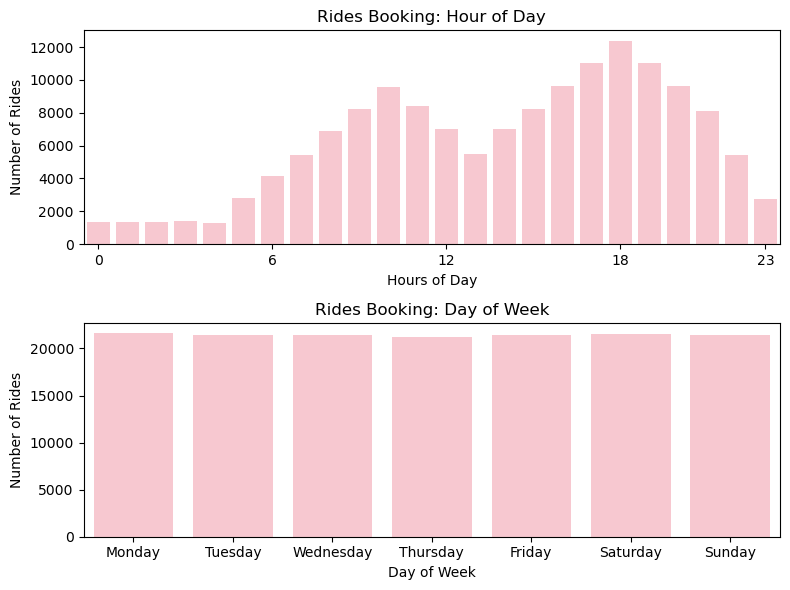

In [1650]:
#Rides booking by hour of day & day of week - Overall Rides Booking
plt.figure(figsize=(8,6))

#Rides booking by hour of day

plt.subplot(2,1,1)
ax=sns.countplot(data=df,x='hour',color='pink')
ax.set_xticks([0, 6, 12, 18, 23])
plt.title('Rides Booking: Hour of Day')
plt.xlabel('Hours of Day')
plt.ylabel('Number of Rides')

#Rides booking by day of week
plt.subplot(2,1,2)
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(data=df,x='day_of_week',color='pink',order=day_order)
plt.title('Rides Booking: Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')

plt.tight_layout()
plt.show()

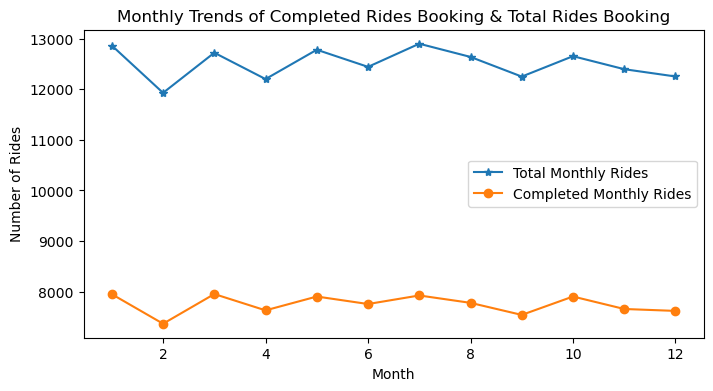

In [1927]:
#Monthly trend of completed rides booking vs overall booking 
plt.figure(figsize=(8,4))

completed_df=df[df['booking_status']=='Completed']
completed_monthly_rides=completed_df.groupby('month').size()
total_monthly_rides=df.groupby('month').size()
plt.plot(total_monthly_rides.index,total_monthly_rides.values,marker='*',label='Total Monthly Rides')
plt.plot(completed_monthly_rides.index,completed_monthly_rides.values,marker='o',label='Completed Monthly Rides')
plt.title('Monthly Trends of Completed Rides Booking & Total Rides Booking')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.legend()
plt.show()

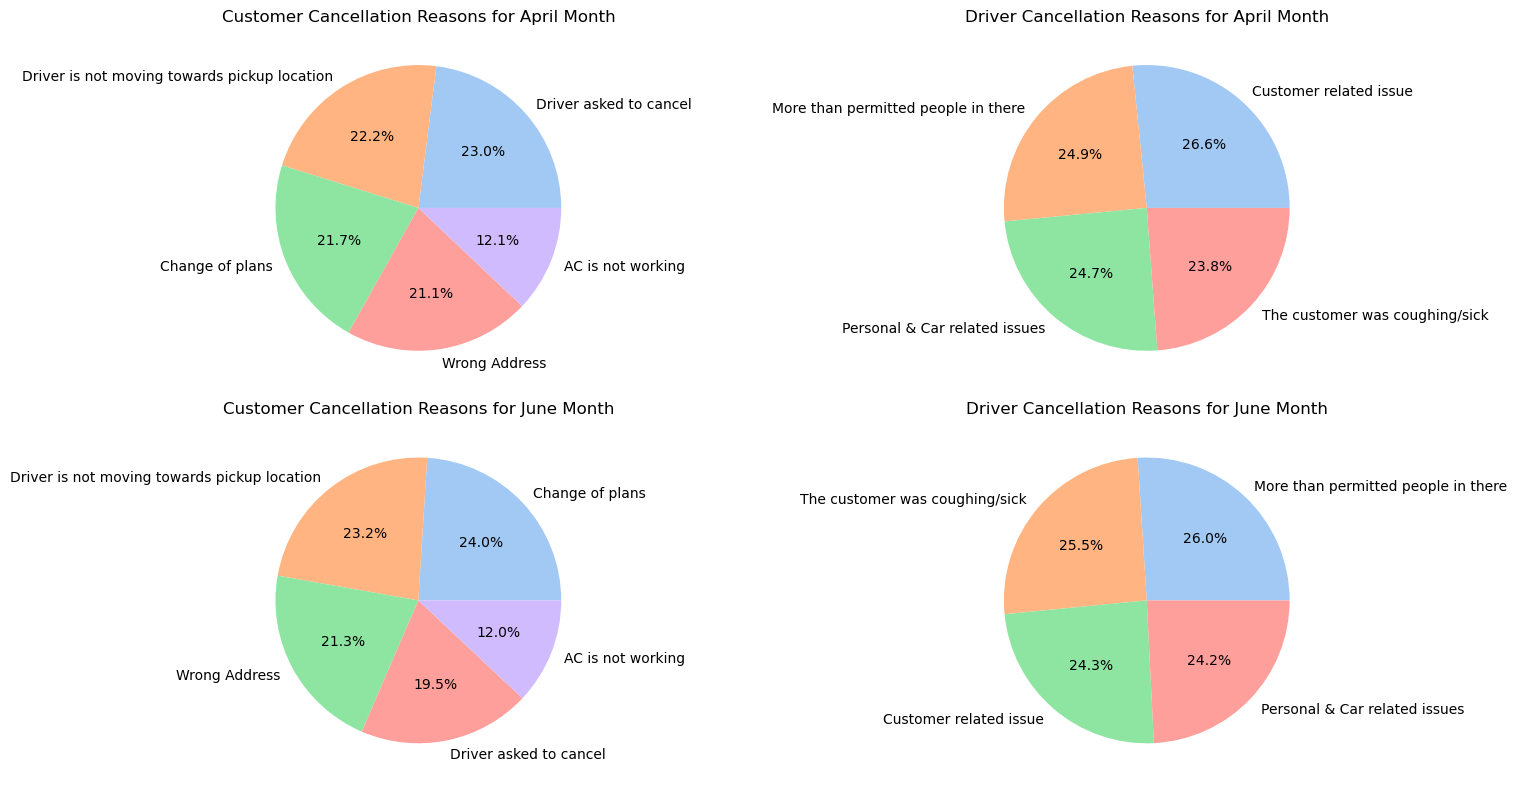

In [1973]:
#4th(April) and 6th(June) month cancellation reasons - Monthly Trends - Booked Rides
plt.figure(figsize=(16,8))

#Customer April Month Cancellation Reasons
plt.subplot(2,2,1)
colors = sns.color_palette("pastel")[0:5]
cust_month_cancels = booked_df[(booked_df['booking_status'] == 'Cancelled by Customer') & \
                                (booked_df['month'] == 4)]
cust_month_reason_counts = cust_month_cancels['customer_cancellation_reason'].value_counts()
plt.pie(cust_month_reason_counts.values, labels=cust_month_reason_counts.index, autopct='%1.1f%%',colors=colors)
plt.title('Customer Cancellation Reasons for April Month')


#Driver April Month Cancellation Reasons
plt.subplot(2,2,2)
colors = sns.color_palette("pastel")[0:4]
driver_month_cancels = booked_df[(booked_df['booking_status'] == 'Cancelled by Driver') & \
                                (booked_df['month'] == 4)]
driver_month_reason_counts = driver_month_cancels['driver_cancellation_reason'].value_counts()
plt.pie(driver_month_reason_counts.values, labels=driver_month_reason_counts.index, autopct='%1.1f%%',colors=colors)
plt.title('Driver Cancellation Reasons for April Month')

#Customer June Month Cancellation Reasons
plt.subplot(2,2,3)
colors = sns.color_palette("pastel")[0:5]
cust_month_cancels = booked_df[(booked_df['booking_status'] == 'Cancelled by Customer') & \
                                (booked_df['month'] == 6)]
cust_month_reason_counts = cust_month_cancels['customer_cancellation_reason'].value_counts()
plt.pie(cust_month_reason_counts.values, labels=cust_month_reason_counts.index, autopct='%1.1f%%',colors=colors)
plt.title('Customer Cancellation Reasons for June Month')

#Driver June Month Cancellation Reasons
plt.subplot(2,2,4)
colors = sns.color_palette("pastel")[0:4]
driver_month_cancels = booked_df[(booked_df['booking_status'] == 'Cancelled by Driver') & \
                                (booked_df['month'] == 6)]
driver_month_reason_counts = driver_month_cancels['driver_cancellation_reason'].value_counts()
plt.pie(driver_month_reason_counts.values, labels=driver_month_reason_counts.index, autopct='%1.1f%%',colors=colors)
plt.title('Driver Cancellation Reasons for June Month')

plt.tight_layout()
plt.show()

In [1979]:
#NO DRIVER FOUND IN THE MONTH OF APRIL AND JUNE
overall_nodriver_df=df[df['booking_status'] =='No Driver Found']
overall_nodriver_df['month'].value_counts()

month
8     936
9     904
7     904
3     892
1     885
5     869
10    867
11    861
6     856
2     850
4     842
12    834
Name: count, dtype: int64

In [1943]:
#Cancellation Rate - Overall Rides Booking
overall_cancel_df=df[df['booking_status'].isin(['Cancelled by Driver','Cancelled by Customer'])]
round((100*overall_cancel_df['month'].value_counts()\
/df['month'].value_counts()).sort_values(ascending=False),2)

month
2     25.39
5     25.32
7     25.31
8     25.21
12    25.09
1     25.01
9     24.98
11    24.88
6     24.83
3     24.73
10    24.65
4     24.59
Name: count, dtype: float64

In [1945]:
#Incompletion Rate -  Overall Rides Booking
overall_incomplete_df=df[df['booking_status'] =='Incomplete']
round((100*overall_incomplete_df['month'].value_counts()\
/df['month'].value_counts()).sort_values(ascending=False),2)

month
11    6.37
1     6.28
7     6.23
9     6.07
10    6.02
5     6.01
4     5.94
6     5.93
12    5.89
8     5.82
3     5.72
2     5.71
Name: count, dtype: float64

In [1949]:
#No Driver Found status - Overall Rides Booking
overall_nodriver_df=df[df['booking_status'] =='No Driver Found']
round((100*overall_nodriver_df['month'].value_counts()\
/df['month'].value_counts()).sort_values(ascending=False),2)

month
8     7.41
9     7.38
2     7.13
3     7.01
7     7.01
11    6.95
4     6.90
1     6.88
6     6.88
10    6.85
12    6.81
5     6.80
Name: count, dtype: float64

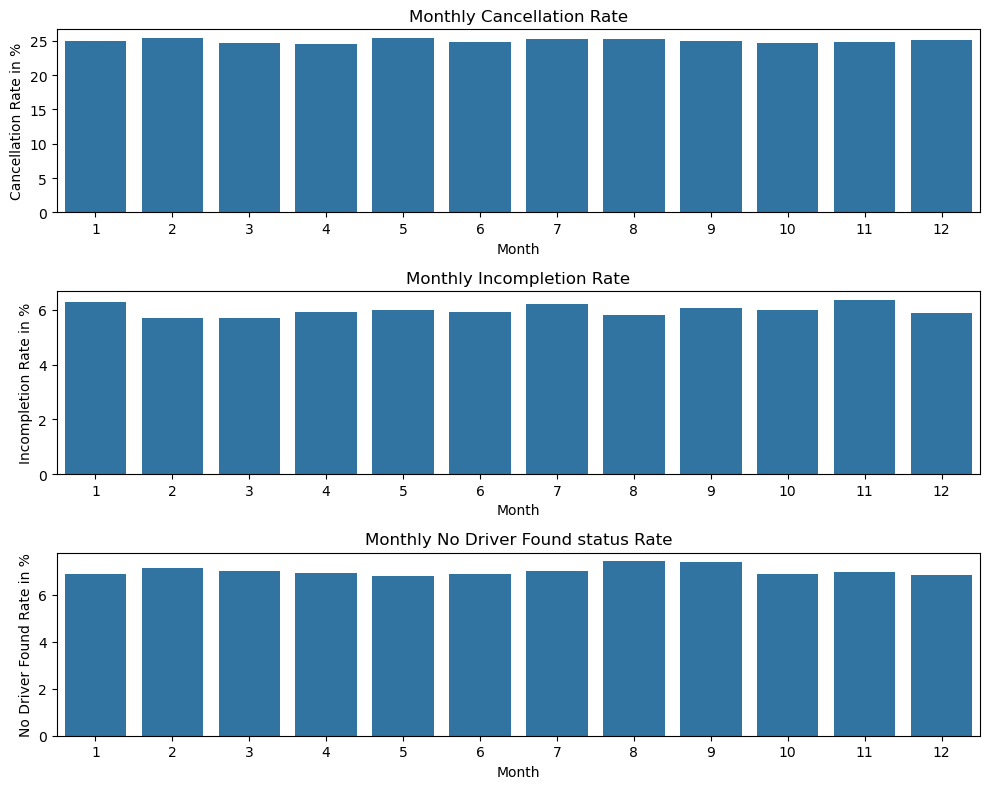

In [1951]:
#completed_df - only complete booking
#booked_df - includes complete,cancelled by driver/customer
#df - Overall Rides Booking

plt.figure(figsize=(10,8))

#Monthly Cancellation on Total Rides Booking
plt.subplot(3,1,1)
overall_cancel_df=df[df['booking_status'].isin(['Cancelled by Driver','Cancelled by Customer'])]
cancel_df_pct=100*overall_cancel_df['month'].value_counts()\
/df['month'].value_counts()
sns.barplot(x=cancel_df_pct.index,y=cancel_df_pct.values)
plt.title("Monthly Cancellation Rate")
plt.xlabel('Month')
plt.ylabel('Cancellation Rate in %')

#Monthly Incompletion on Overall Rides Booking
plt.subplot(3,1,2)
overall_incomplete_df=df[df['booking_status'] =='Incomplete']
incomplete_df_pct=100*overall_incomplete_df['month'].value_counts()\
/df['month'].value_counts()
sns.barplot(x=incomplete_df_pct.index,y=incomplete_df_pct.values)
plt.title("Monthly Incompletion Rate")
plt.xlabel('Month')
plt.ylabel('Incompletion Rate in %')

#No Driver Found rate on Overall Rides Booking
plt.subplot(3,1,3)
overall_nodriver_df=df[df['booking_status'] =='No Driver Found']
nodriver_df_pct=100*overall_nodriver_df['month'].value_counts()\
/df['month'].value_counts()
sns.barplot(x=nodriver_df_pct.index,y=nodriver_df_pct.values)
plt.title("Monthly No Driver Found status Rate")
plt.xlabel('Month')
plt.ylabel('No Driver Found Rate in %')

plt.tight_layout()
plt.show()

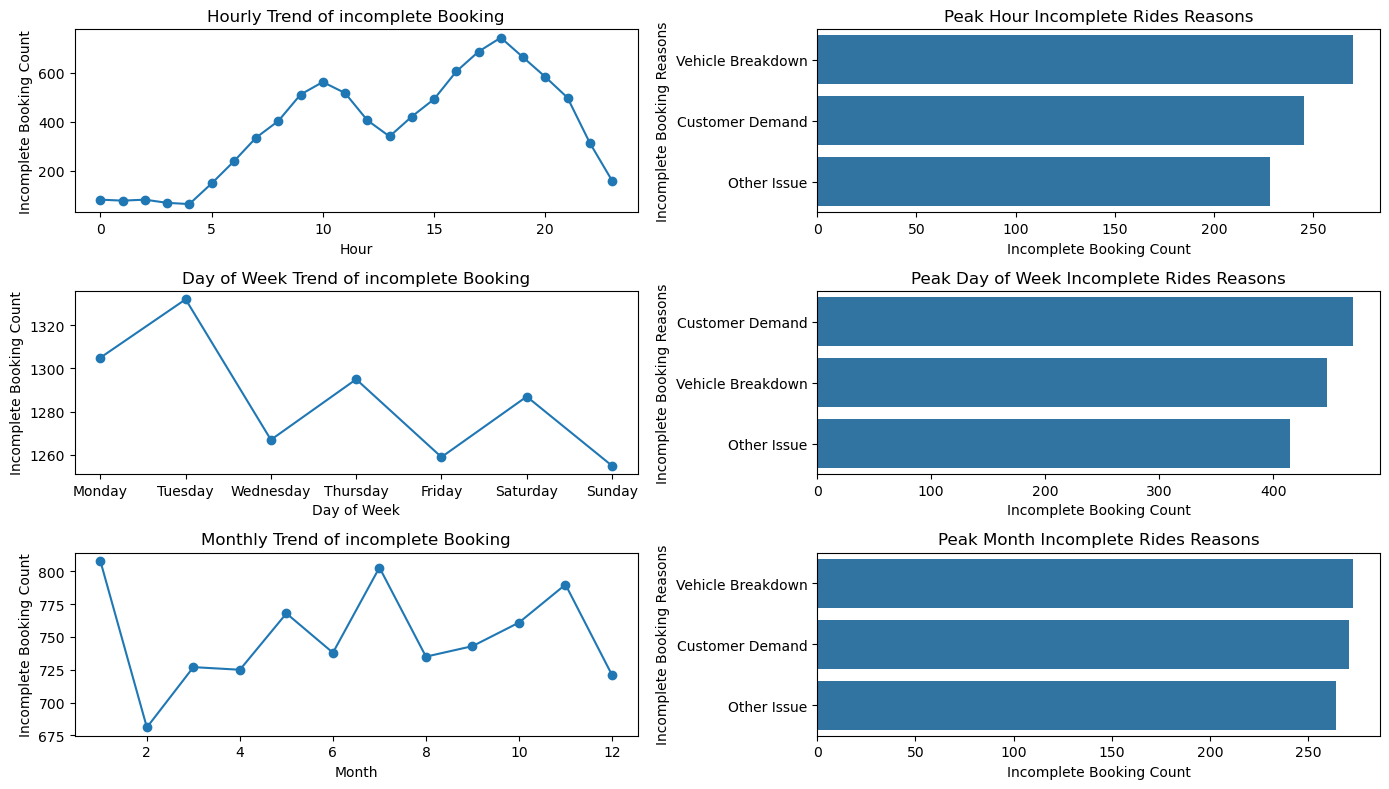

In [1959]:
#incomplete rides trend and reason for incomplete rides
plt.figure(figsize=(14,8))

#incomplete rides hourly trend
plt.subplot(3,2,1)
incomplete_df=df[df['booking_status']=='Incomplete']
hourly_incomplete_booking=incomplete_df.groupby('hour').size()
plt.plot(hourly_incomplete_booking.index,hourly_incomplete_booking.values,marker='o')
plt.title('Hourly Trend of incomplete Booking')
plt.xlabel('Hour')
plt.ylabel('Incomplete Booking Count')

plt.subplot(3,2,2)
peak_incomplete_booking_hour=incomplete_df.groupby('hour').size().idxmax()
peak_incomplete_booking_hour_df = incomplete_df[(incomplete_df['hour'] == peak_incomplete_booking_hour)]
reason_peak_hour = peak_incomplete_booking_hour_df['incomplete_rides_reason'].value_counts()
sns.barplot(x=reason_peak_hour.values, y=reason_peak_hour.index)
plt.title('Peak Hour Incomplete Rides Reasons')
plt.xlabel('Incomplete Booking Count')
plt.ylabel('Incomplete Booking Reasons')

#incomplete rides day of week trend
plt.subplot(3,2,3)
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_incomplete_booking=incomplete_df.groupby('day_of_week').size()
day_incomplete_booking = day_incomplete_booking.reindex(day_order)
plt.plot(day_incomplete_booking.index,day_incomplete_booking.values,marker='o')
plt.title('Day of Week Trend of incomplete Booking')
plt.xlabel('Day of Week')
plt.ylabel('Incomplete Booking Count')

plt.subplot(3,2,4)
peak_incomplete_booking_day=incomplete_df.groupby('day_of_week').size().idxmax()
peak_incomplete_booking_day_df = incomplete_df[(incomplete_df['day_of_week'] == peak_incomplete_booking_day)]
reason_peak_day = peak_incomplete_booking_day_df['incomplete_rides_reason'].value_counts()
sns.barplot(x=reason_peak_day.values, y=reason_peak_day.index)
plt.title('Peak Day of Week Incomplete Rides Reasons')
plt.xlabel('Incomplete Booking Count')
plt.ylabel('Incomplete Booking Reasons')

#incomplete rides monthly trend
plt.subplot(3,2,5)
incomplete_booking=incomplete_df.groupby('month').size()
plt.plot(incomplete_booking.index,incomplete_booking.values,marker='o')
plt.title('Monthly Trend of incomplete Booking')
plt.xlabel('Month')
plt.ylabel('Incomplete Booking Count')

plt.subplot(3,2,6)
peak_incomplete_booking_month=incomplete_df.groupby('month').size().idxmax()
peak_incomplete_booking_month_df = incomplete_df[(incomplete_df['month'] == peak_incomplete_booking_month)]
reason_peak_month = peak_incomplete_booking_month_df['incomplete_rides_reason'].value_counts()
sns.barplot(x=reason_peak_month.values, y=reason_peak_month.index)
plt.title('Peak Month Incomplete Rides Reasons')
plt.xlabel('Incomplete Booking Count')
plt.ylabel('Incomplete Booking Reasons')

plt.tight_layout()
plt.show()

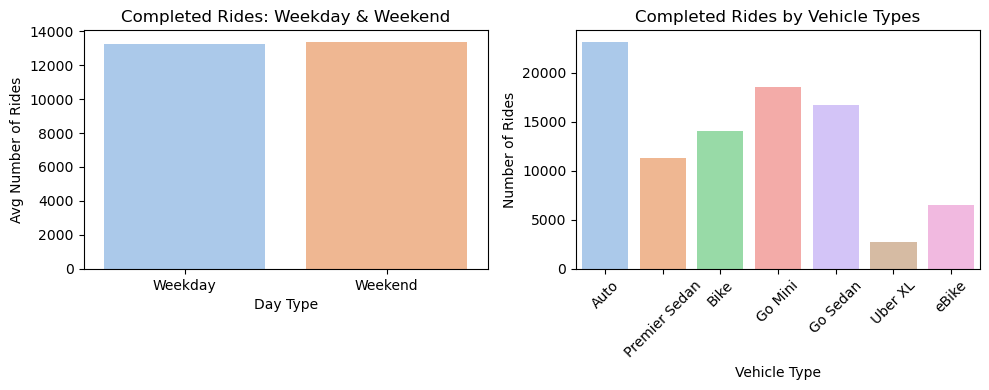

In [1961]:
#Completed Rides: weekday vs weekend & Completed rides by vehicle types
plt.figure(figsize=(10,4))

#Weekday vs Weekend Complted Rides Trends(Average)

plt.subplot(1,2,1)
completed_df['day_type'] = completed_df['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
avg_completed_df=completed_df.groupby('day_type')['day_type'].value_counts()/completed_df.groupby('day_type')['day_of_week'].nunique()
sns.barplot(x=avg_completed_df.index, y=avg_completed_df.values, palette="pastel")
plt.title("Completed Rides: Weekday & Weekend")
plt.xlabel('Day Type')
plt.ylabel('Avg Number of Rides')

#completed ride trends by vehicle type 

plt.subplot(1,2,2)
sns.countplot(x='vehicle_type', data=completed_df, palette="pastel")
plt.title("Completed Rides by Vehicle Types")
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Rides')
plt.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

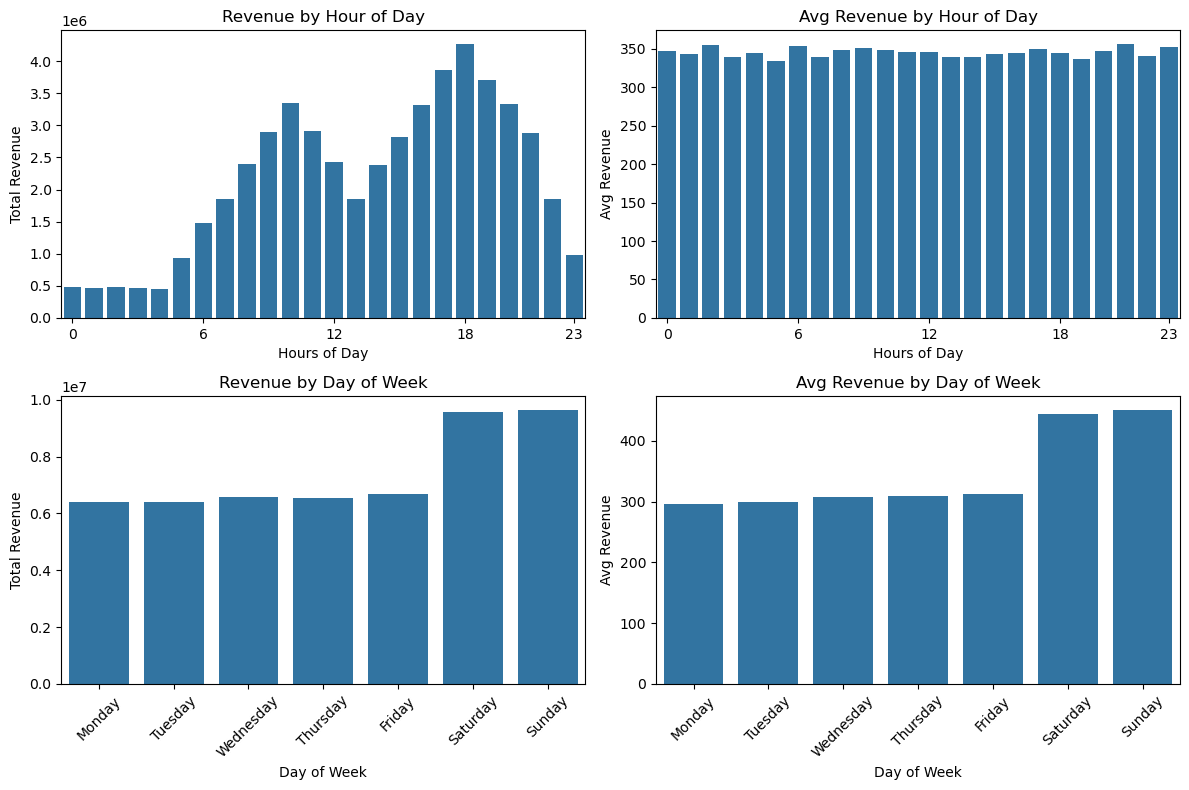

In [1963]:
#Hourly Revenue/avg Revenue by hour/day -Overall Rides Booking

plt.figure(figsize=(12,8))

#Total revenue by hour of the day
plt.subplot(2,2,1)
hourly_revenue=df.groupby('hour')['booking_value'].sum()
ax=sns.barplot(x=hourly_revenue.index,y=hourly_revenue.values)
ax.set_xticks([0, 6, 12, 18, 23])
plt.title('Revenue by Hour of Day')
plt.xlabel('Hours of Day')
plt.ylabel('Total Revenue')

#Avg revenue by hour of the day
plt.subplot(2,2,2)
hourly_avg_revenue=df.groupby('hour')['booking_value'].mean()
ax=sns.barplot(x=hourly_avg_revenue.index,y=hourly_avg_revenue.values)
ax.set_xticks([0, 6, 12, 18, 23])
plt.title('Avg Revenue by Hour of Day')
plt.xlabel('Hours of Day')
plt.ylabel('Avg Revenue')

#Total revenue by day of week
plt.subplot(2,2,3)
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_revenue=df.groupby('day_of_week')['booking_value'].sum()
sns.barplot(x=weekly_revenue.index,y=weekly_revenue.values,order=day_order)
plt.title('Revenue by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue')
plt.tick_params(axis='x', rotation=45)

#Avg revenue by day of week
plt.subplot(2,2,4)
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_avg_revenue=df.groupby('day_of_week')['booking_value'].mean()
sns.barplot(x=weekly_avg_revenue.index,y=weekly_avg_revenue.values,order=day_order)
plt.title('Avg Revenue by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Avg Revenue')
plt.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

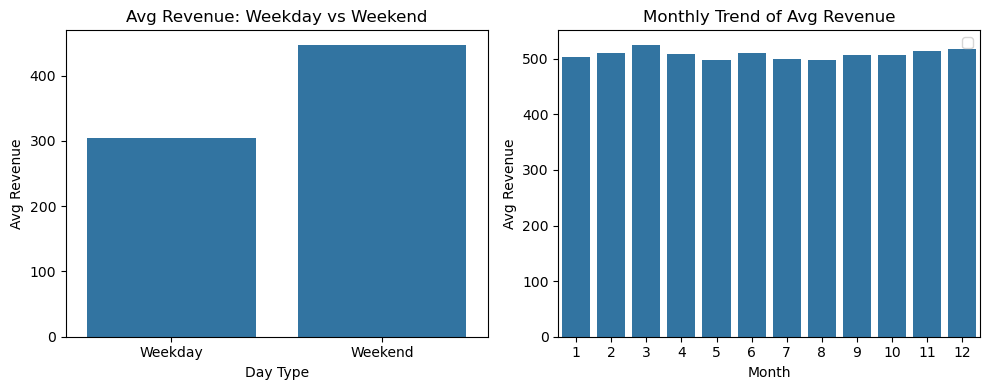

In [1965]:
#Average Revneue Trend: weekday vs weekend & Monthly trend
plt.figure(figsize=(10,4))

#Weekday vs Weekend Avg Revenue Trend
plt.subplot(1,2,1)
df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
#day_type_avg_revenue=df.groupby('day_type')['booking_value'].sum()/df.groupby('day_type')['day_of_week'].nunique()
day_type_avg_revenue=df.groupby('day_type')['booking_value'].mean()
sns.barplot(x=day_type_avg_revenue.index, y=day_type_avg_revenue.values)
plt.title("Avg Revenue: Weekday vs Weekend")
plt.xlabel('Day Type')
plt.ylabel('Avg Revenue')

#Monthly Avg Revenue trend 
plt.subplot(1,2,2)
monthly_avg_revenue=completed_df.groupby('month')['booking_value'].mean()
sns.barplot(x=monthly_avg_revenue.index,y=monthly_avg_revenue.values)
plt.title('Monthly Trend of Avg Revenue')
plt.xlabel('Month')
plt.ylabel('Avg Revenue')
plt.legend()

plt.tight_layout()
plt.show()

In [1669]:
#Check revenue generated by incomplete booking if any

df[df['booking_status']=='Incomplete']['booking_value'].sum()

4585609.0

In [1670]:
#Percentage of Revenue generated by Incomplete Ride
(df[df['booking_status']=='Incomplete']['booking_value'].sum()/df['booking_value'].sum())*100

8.844641465698642

In [1671]:
##Percentage of Revenue generated by complete Ride
(df[df['booking_status']=='Completed']['booking_value'].sum()/df['booking_value'].sum())*100

91.15535853430136

In [1981]:
#Revenue generation by all type booking status

df.groupby('booking_status')['booking_value'].sum()

booking_status
Cancelled by Customer           0.0
Cancelled by Driver             0.0
Completed                47260574.0
Incomplete                4585609.0
No Driver Found                 0.0
Name: booking_value, dtype: float64

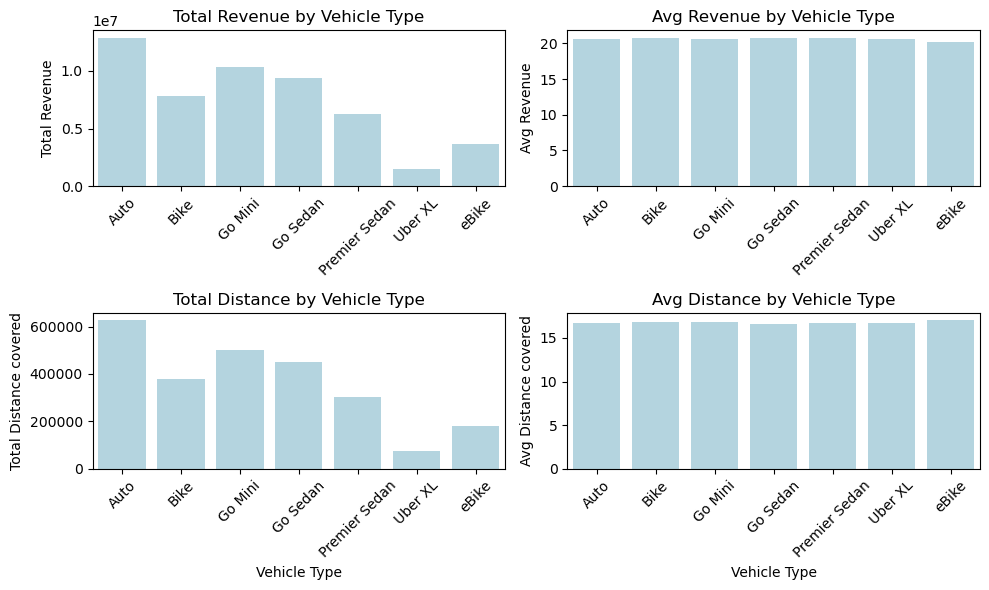

In [1983]:
#Total/Avg Revenue & Distance covered by vehicle types - Overall Rides Booking
plt.figure(figsize=(10,6))

#Total Revenue by vehicle types
plt.subplot(2,2,1)
total_revenue=df.groupby('vehicle_type')['booking_value'].sum()
sns.barplot(x=total_revenue.index,y=total_revenue.values,color='lightblue')
plt.title('Total Revenue by Vehicle Type')
plt.xlabel('')
plt.ylabel('Total Revenue')
plt.tick_params(axis='x', rotation=45)

#Avg Revenue by vehicle types
plt.subplot(2,2,2)
avg_revenue=df.groupby('vehicle_type')['booking_value'].sum()/df.groupby('vehicle_type')['ride_distance'].sum()
sns.barplot(x=avg_revenue.index,y=avg_revenue.values,color='lightblue')
plt.title('Avg Revenue by Vehicle Type')
plt.xlabel('')
plt.ylabel('Avg Revenue')
plt.tick_params(axis='x', rotation=45)

#Ride Distance by Vehicle Types
plt.subplot(2,2,3)
total_dist=df.groupby('vehicle_type')['ride_distance'].sum()
sns.barplot(x=total_dist.index,y=total_dist.values,color='lightblue')
plt.title('Total Distance by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Distance covered')
plt.tick_params(axis='x', rotation=45)

#Avg Ride Distance by Vehicle Types
plt.subplot(2,2,4)
avg_dist=df.groupby('vehicle_type')['ride_distance'].mean()
sns.barplot(x=avg_dist.index,y=avg_dist.values,color='lightblue')
plt.title('Avg Distance by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Avg Distance covered')
plt.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [1999]:
# It creates 5 bins for ride_distance
completed_df['distance_range'] = pd.cut(completed_df['ride_distance'],\
                                        bins=[0, 5, 10, 20, 50, 100],labels=['0-5km', '5-10km', '10-20km', '20-50km', '50km+'])
completed_df['distance_range']

2         10-20km
3         20-50km
4         20-50km
5           0-5km
6         20-50km
           ...   
149995    20-50km
149996    20-50km
149997    10-20km
149998    20-50km
149999    20-50km
Name: distance_range, Length: 93000, dtype: category
Categories (5, object): ['0-5km' < '5-10km' < '10-20km' < '20-50km' < '50km+']

In [2001]:
#Ride count - overall ride booking
distance_stats['ride_count'] =df.groupby(pd.cut(df['ride_distance'],bins=[0, 5, 10, 20, 50, 100],\
                                        labels=['0-5km', '5-10km', '10-20km', '20-50km', '50km+'])).agg({'booking_id' : 'count'})
distance_stats['ride_count']

ride_distance
0-5km       7603
5-10km     12163
10-20km    23978
20-50km    58256
50km+          0
Name: ride_count, dtype: int64

In [2003]:
#Ride count - Completed Ride Booking
distance_stats['ride_count'] = completed_df.groupby(pd.cut(completed_df['ride_distance'],bins=[0, 5, 10, 20, 50, 100],\
                                        labels=['0-5km', '5-10km', '10-20km', '20-50km', '50km+'])).agg({'booking_id' : 'count'})
distance_stats['ride_count'] 

ride_distance
0-5km       5786
5-10km      9738
10-20km    19220
20-50km    58256
50km+          0
Name: ride_count, dtype: int64

In [2005]:
#Avg booking value - overall ride booking
distance_stats['booking_value'] =df.groupby(pd.cut(df['ride_distance'],bins=[0, 5, 10, 20, 50, 100],\
                                        labels=['0-5km', '5-10km', '10-20km', '20-50km', '50km+'])).agg({'booking_value' : 'mean'}).round(2)
distance_stats['booking_value']

ride_distance
0-5km      505.11
5-10km     502.07
10-20km    508.35
20-50km    509.99
50km+         NaN
Name: booking_value, dtype: float64

In [2007]:
#Avg booking value - completed Ride booking
distance_stats['booking_value'] = completed_df.groupby(pd.cut(completed_df['ride_distance'],bins=[0, 5, 10, 20, 50, 100],\
                                        labels=['0-5km', '5-10km', '10-20km', '20-50km', '50km+'])).agg({'booking_value' : 'mean'}).round(2)
distance_stats['booking_value']

ride_distance
0-5km      502.97
5-10km     503.57
10-20km    506.60
20-50km    509.99
50km+         NaN
Name: booking_value, dtype: float64

In [2009]:
#Ride distance - Completed Ride Booking
distance_stats['booking_value'] = completed_df.groupby(pd.cut(completed_df['ride_distance'],bins=[0, 5, 10, 20, 50, 100],\
                                        labels=['0-5km', '5-10km', '10-20km', '20-50km', '50km+'])).agg({'booking_value' : 'sum'})
distance_stats['booking_value']

ride_distance
0-5km       2910168.0
5-10km      4903723.0
10-20km     9736833.0
20-50km    29709850.0
50km+             0.0
Name: booking_value, dtype: float64

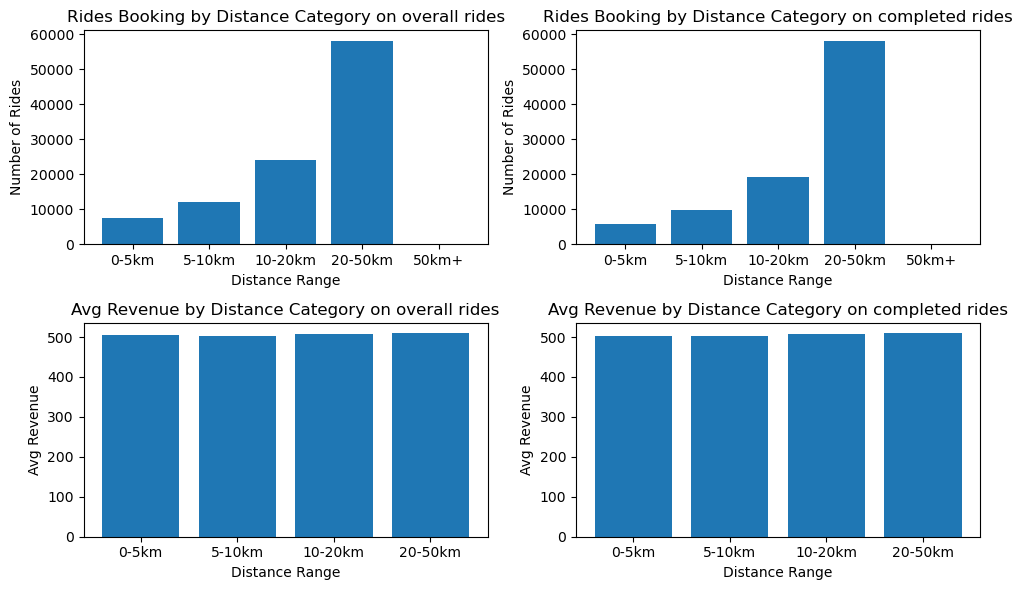

In [2011]:
#rides Booking and Avg Revenue by distnace category
plt.figure(figsize=(10,6))

# Distance distribution on overall rides booking
plt.subplot(2,2,1)
distance_stats['ride_count'] =df.groupby(pd.cut(df['ride_distance'],bins=[0, 5, 10, 20, 50, 100],\
                                        labels=['0-5km', '5-10km', '10-20km', '20-50km', '50km+'])).agg({'booking_id' : 'count'}).round(2)
plt.bar(distance_stats.index, distance_stats['ride_count'])
plt.title('Rides Booking by Distance Category on overall rides')
plt.xlabel('Distance Range')
plt.ylabel('Number of Rides')

# Distance distribution on completed rides booking
plt.subplot(2,2,2)
distance_stats['ride_count'] = completed_df.groupby(pd.cut(completed_df['ride_distance'],bins=[0, 5, 10, 20, 50, 100],\
                                        labels=['0-5km', '5-10km', '10-20km', '20-50km', '50km+'])).agg({'booking_id' : 'count'}).round(2)
plt.bar(distance_stats.index, distance_stats['ride_count'])
plt.title('Rides Booking by Distance Category on completed rides')
plt.xlabel('Distance Range')
plt.ylabel('Number of Rides')

#Avg Revenue Distribution on overall rides booking
plt.subplot(2,2,3)
distance_stats['booking_value'] =df.groupby(pd.cut(df['ride_distance'],bins=[0, 5, 10, 20, 50, 100],\
                                        labels=['0-5km', '5-10km', '10-20km', '20-50km', '50km+'])).agg({'booking_value' : 'mean'}).round(2)
plt.bar(distance_stats.index, distance_stats['booking_value'])
plt.title('Avg Revenue by Distance Category on overall rides')
plt.xlabel('Distance Range')
plt.ylabel('Avg Revenue')

#Avg Revenue Distribution on completed rides booking
plt.subplot(2,2,4)
distance_stats['booking_value'] = completed_df.groupby(pd.cut(completed_df['ride_distance'],bins=[0, 5, 10, 20, 50, 100],\
                                        labels=['0-5km', '5-10km', '10-20km', '20-50km', '50km+'])).agg({'booking_value' : 'mean'}).round(2)
plt.bar(distance_stats.index, distance_stats['booking_value'])
plt.title('Avg Revenue by Distance Category on completed rides')
plt.xlabel('Distance Range')
plt.ylabel('Avg Revenue')

plt.tight_layout()
plt.show()

In [2013]:
#Calculate revenue per km - Completed Rides
completed_df['revenue_per_km']=completed_df['booking_value'] / completed_df['ride_distance']
completed_df['revenue_per_km']

2         46.170839
3         12.228101
4         15.287285
5         65.154639
6         15.518914
            ...    
149995    11.851297
149996    51.290474
149997    53.483992
149998     7.312253
149999    38.036810
Name: revenue_per_km, Length: 93000, dtype: float64

In [2015]:
#Calculate avg revenue per km - Completed Rides
avg_rev_per_km=completed_df.groupby('distance_range')['revenue_per_km'].mean()
avg_rev_per_km

distance_range
0-5km      153.520045
5-10km      69.660729
10-20km     35.017360
20-50km     15.603309
50km+             NaN
Name: revenue_per_km, dtype: float64

In [2023]:
completed_df.describe()

,date_time,avg_vtat,avg_ctat,cancelled_rides_by_customer,cancelled_rides_by_driver,incomplete_rides,booking_value,ride_distance,driver_ratings,customer_rating,hour,month,revenue_per_km
count,93000,93000.000000,93000.000000,93000.0,93000.0,93000.0,93000.000000,93000.000000,93000.000000,93000.000000,93000.000000,93000.000000,93000.000000
mean,2024-07-01 06:14:01.753290240,8.511878,30.034772,0.0,0.0,0.0,508.178215,26.000493,4.230992,4.404584,14.030806,6.489194,33.856378
min,2024-01-01 00:19:34,2.000000,15.000000,0.0,0.0,0.0,50.000000,2.000000,3.000000,3.000000,0.000000,1.000000,1.008065
25%,2024-03-31 21:12:46.500000,5.300000,22.600000,0.0,0.0,0.0,234.000000,14.100000,4.100000,4.200000,10.000000,3.000000,8.988193
50%,2024-06-30 19:44:34,8.500000,30.000000,0.0,0.0,0.0,414.000000,26.020000,4.300000,4.500000,15.000000,6.000000,17.703937
75%,2024-09-30 18:47:31.750000128,11.800000,37.500000,0.0,0.0,0.0,689.000000,37.942500,4.600000,4.800000,18.000000,9.000000,35.576148
max,2024-12-30 23:21:12,15.000000,45.000000,0.0,0.0,0.0,4277.000000,50.000000,5.000000,5.000000,23.000000,12.000000,1666.990291
std,NaN,3.748138,8.650707,0.0,0.0,0.0,396.058769,13.824176,0.436871,0.437819,5.423166,3.444917,54.137711


In [2027]:
#creating pivot 
pivot_stats = avg_revenue_per_km_stats.pivot(index='vehicle_type',columns='distance_range',values='revenue_per_km')
pivot_stats

distance_range,0-5km,5-10km,10-20km,20-50km,50km+
vehicle_type,,,,,
Auto,154.731829,69.911433,34.373987,15.537749,NaN
Bike,151.752750,68.512777,35.731065,15.683766,NaN
Go Mini,147.082337,69.921410,35.091145,15.550084,NaN
Go Sedan,163.430379,69.882818,35.138921,15.722983,NaN
Premier Sedan,153.826278,70.001334,35.456374,15.562325,NaN
Uber XL,144.195683,71.380129,36.207999,15.515475,NaN
eBike,149.035980,68.570041,33.920671,15.614108,NaN


In [2029]:
#Calculate % drop in revenue per km by vehicle types - Completed Rides
pivot_stats['%_drop']=((pivot_stats['0-5km'] - pivot_stats['20-50km']) / pivot_stats['0-5km']) * 100
pivot_stats

distance_range,0-5km,5-10km,10-20km,20-50km,50km+,%_drop
vehicle_type,,,,,,
Auto,154.731829,69.911433,34.373987,15.537749,NaN,89.958272
Bike,151.752750,68.512777,35.731065,15.683766,NaN,89.664921
Go Mini,147.082337,69.921410,35.091145,15.550084,NaN,89.427633
Go Sedan,163.430379,69.882818,35.138921,15.722983,NaN,90.379400
Premier Sedan,153.826278,70.001334,35.456374,15.562325,NaN,89.883182
Uber XL,144.195683,71.380129,36.207999,15.515475,NaN,89.239987
eBike,149.035980,68.570041,33.920671,15.614108,NaN,89.523263


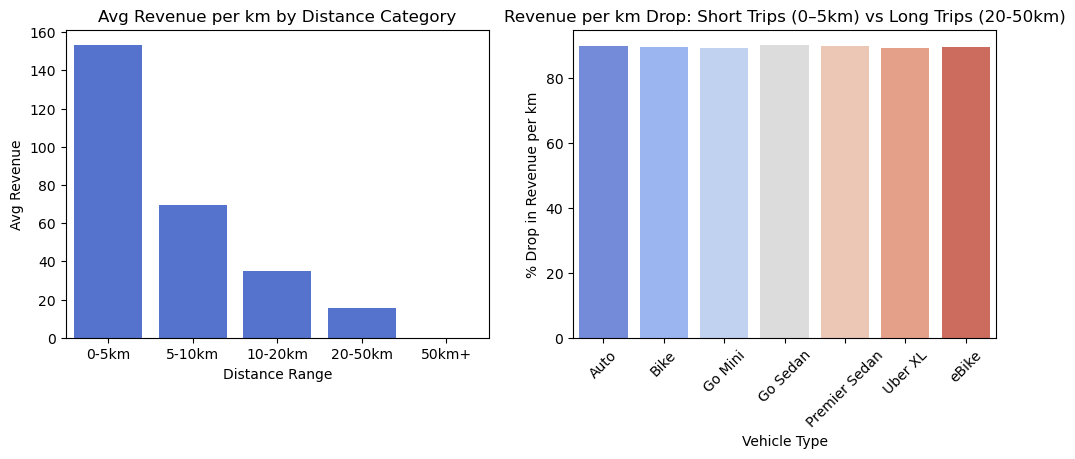

In [1693]:
#Avg Revenue per km  Distribution - Completed Rides Booking
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.barplot(x=avg_rev_per_km.index, y=avg_rev_per_km.values,color='royalblue')
plt.title('Avg Revenue per km by Distance Category')
plt.xlabel('Distance Range')
plt.ylabel('Avg Revenue')

#Avg Revenue per km Drop: Short Trips (0–5km) vs Long Trips (20-50km)
plt.subplot(1,2,2)
pivot_stats = avg_revenue_per_km_stats.pivot(index='vehicle_type',columns='distance_range',values='revenue_per_km')
pivot_stats['%_drop']=((pivot_stats['0-5km'] - pivot_stats['20-50km']) / pivot_stats['0-5km']) * 100

sns.barplot(data=pivot_stats.reset_index(),x='vehicle_type',y='%_drop',palette='coolwarm')

plt.title("Revenue per km Drop: Short Trips (0–5km) vs Long Trips (20-50km)")
plt.ylabel("% Drop in Revenue per km")
plt.xlabel("Vehicle Type")
plt.tick_params(axis='x', rotation=45)

plt.show()

In [2031]:
#Compare Avg Revenue over vehicle_type and distance range - Completed Rides Booking
avg_revenue_by_type = (completed_df.groupby(['vehicle_type', 'distance_range'])['booking_value'].mean().reset_index())
avg_revenue_by_type

,vehicle_type,distance_range,booking_value
0,Auto,0-5km,503.052846
1,Auto,5-10km,509.853808
2,Auto,10-20km,498.491772
3,Auto,20-50km,508.877354
4,Auto,50km+,NaN
5,Bike,0-5km,496.519144
6,Bike,5-10km,490.514986
7,Bike,10-20km,515.268678
8,Bike,20-50km,511.487142
9,Bike,50km+,NaN


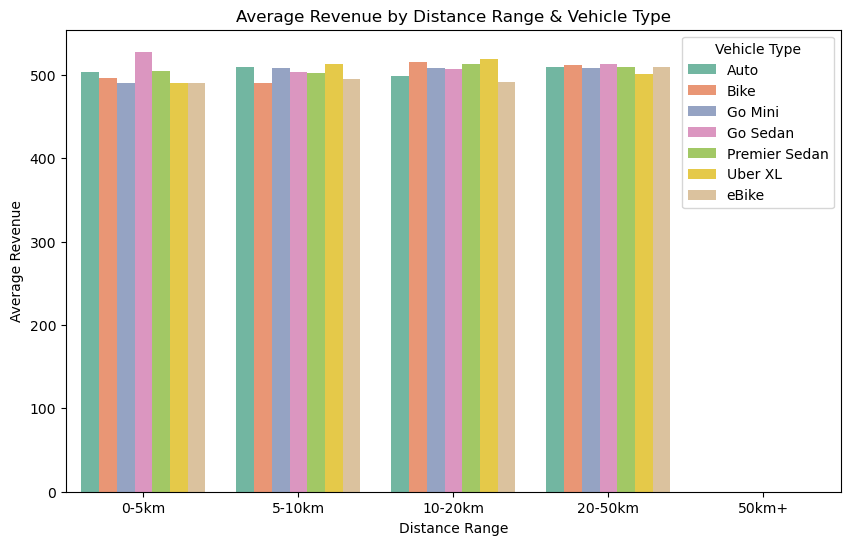

In [2033]:
#Avg revenue over vehicle_type and distance range - Completed Rides Booking
plt.figure(figsize=(10,6))

sns.barplot(data=avg_revenue_by_type,x='distance_range', y='booking_value',hue='vehicle_type', palette='Set2')
plt.title("Average Revenue by Distance Range & Vehicle Type")
plt.xlabel("Distance Range")
plt.ylabel("Average Revenue")
plt.legend(title="Vehicle Type")
plt.show()

In [2035]:
#Compare Avg Revenue Per km over vehicle_type and distance range - Completed Rides Booking
avg_revenue_per_km_stats = (completed_df.groupby(['vehicle_type', 'distance_range'])['revenue_per_km'].mean().reset_index())
avg_revenue_per_km_stats 

,vehicle_type,distance_range,revenue_per_km
0,Auto,0-5km,154.731829
1,Auto,5-10km,69.911433
2,Auto,10-20km,34.373987
3,Auto,20-50km,15.537749
4,Auto,50km+,NaN
5,Bike,0-5km,151.752750
6,Bike,5-10km,68.512777
7,Bike,10-20km,35.731065
8,Bike,20-50km,15.683766
9,Bike,50km+,NaN


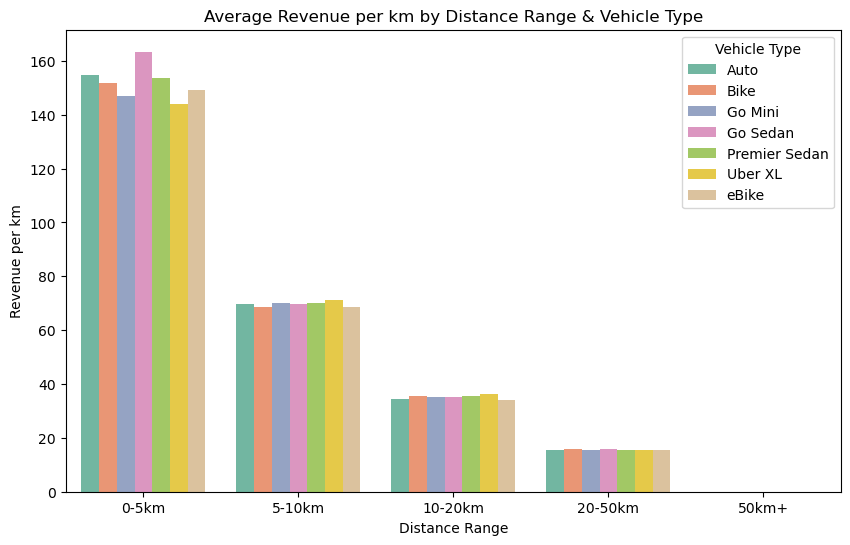

In [2037]:
#Avg Revenue per km over vehicle_type and distance range - Completed Rides Booking
plt.figure(figsize=(10,6))
sns.barplot(data=avg_revenue_per_km_stats,x='distance_range',y='revenue_per_km',hue='vehicle_type',palette='Set2')

plt.title("Average Revenue per km by Distance Range & Vehicle Type")
plt.xlabel("Distance Range")
plt.ylabel("Revenue per km")
plt.legend(title="Vehicle Type")
plt.show()

In [2039]:
#Cust segmentation by rides count,revenue,cancellation
df_cust=df.groupby('customer_id').agg({
    'booking_id': 'count',
    'booking_value': 'sum',
    'cancelled_rides_by_customer': 'sum'
}).rename(columns={'booking_id':'booking_count'})
df_cust

,booking_count,booking_value,cancelled_rides_by_customer
customer_id,,,
CID1000119,1,634.0,0
CID1000157,1,0.0,0
CID1000234,1,458.0,0
CID1000323,1,1498.0,0
CID1000434,1,0.0,0
...,...,...,...
CID9999751,1,804.0,0
CID9999763,1,485.0,0
CID9999783,1,454.0,0


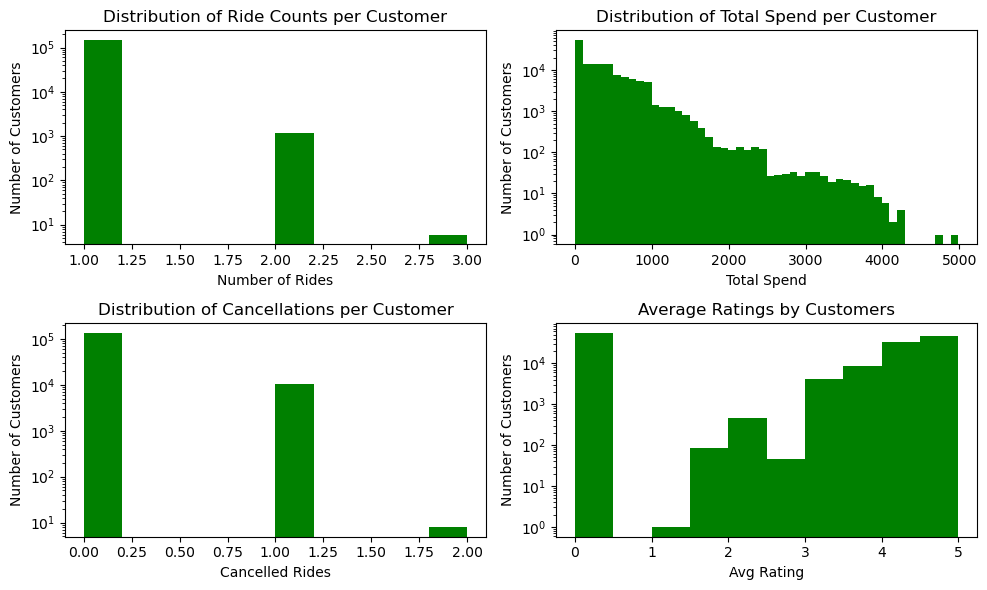

In [2041]:
#Customer Behavior Analaysis - Overall Ride Booking
plt.figure(figsize=(10,6))

# Total Rides per customer
plt.subplot(2,2,1)
#rides_per_customer = df['customer_id'].value_counts()
rides_per_customer = df.groupby('customer_id').size()
#sns.histplot(rides_per_customer,color='green',log_scale=True)
plt.hist(rides_per_customer,color='green',log=True)
plt.title('Distribution of Ride Counts per Customer')
plt.xlabel('Number of Rides')
plt.ylabel('Number of Customers')

#Total spend Per Customer(Customer Lifetime Value)
plt.subplot(2,2,2)
clv = df.groupby('customer_id')['booking_value'].sum().sort_values(ascending=False)
#sns.histplot(clv,bins=30,color='green')
plt.hist(clv,color='green',bins=50,log=True)
plt.title('Distribution of Total Spend per Customer')
plt.xlabel('Total Spend')
plt.ylabel('Number of Customers')

#Cancellation behavior
plt.subplot(2,2,3)
cancellations = df.groupby('customer_id')['cancelled_rides_by_customer'].sum()
#sns.histplot(cancellations, bins=30, color='green')
plt.hist(cancellations,color='green',log=True)
plt.title('Distribution of Cancellations per Customer')
plt.xlabel('Cancelled Rides')
plt.ylabel('Number of Customers')

#Average customer rating
plt.subplot(2,2,4)
avg_customer_rating = df.groupby('customer_id')['customer_rating'].mean()
#sns.histplot(avg_customer_rating, bins=20, color='green')
plt.hist(avg_customer_rating, color='green',log=True)
plt.title('Average Ratings by Customers')
plt.xlabel('Avg Rating')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

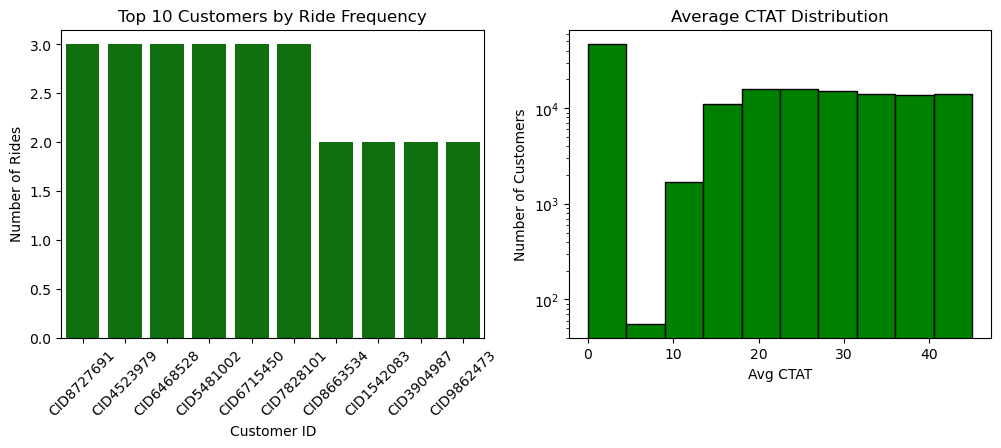

In [2043]:
plt.figure(figsize=(12,4))

#Top Customers by Ride Frequency
plt.subplot(1,2,1)
top_customers = df.groupby('customer_id').size().sort_values(ascending=False).head(10)
sns.barplot(x=top_customers.index,y=top_customers.values, color='green')
plt.title('Top 10 Customers by Ride Frequency')
plt.xlabel('Customer ID')
plt.ylabel('Number of Rides')
plt.tick_params(axis='x', rotation=45)

#Avg waiting time of customer
plt.subplot(1,2,2)
cust_avg_ctat = df.groupby('customer_id')['avg_ctat'].mean()
plt.hist(cust_avg_ctat, color='green',log=True,edgecolor='black')
plt.title('Average CTAT Distribution')
plt.xlabel('Avg CTAT')
plt.ylabel('Number of Customers')
plt.show()

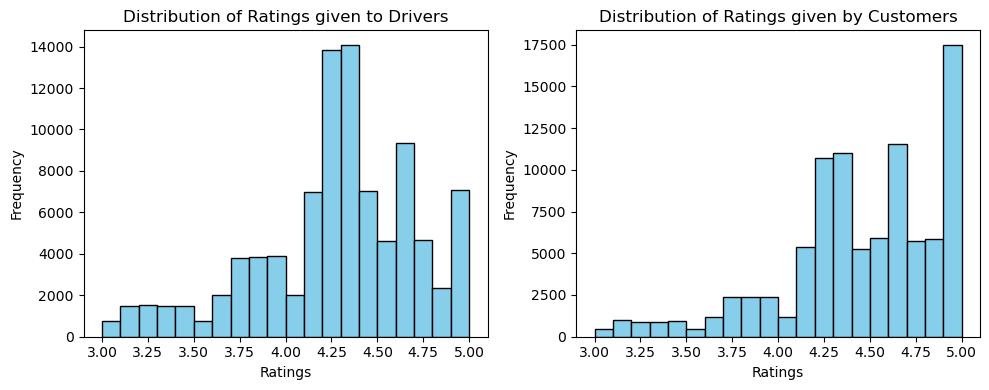

In [2045]:
#Distribution of driver rating
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(df[df['driver_ratings'] != 0]['driver_ratings'],bins=20,color='skyblue',edgecolor='black')
plt.title('Distribution of Ratings given to Drivers')
plt.xlabel('Ratings')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(df[df['customer_rating'] != 0]['customer_rating'],bins=20,color='skyblue',edgecolor='black')
plt.title('Distribution of Ratings given by Customers')
plt.xlabel('Ratings')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

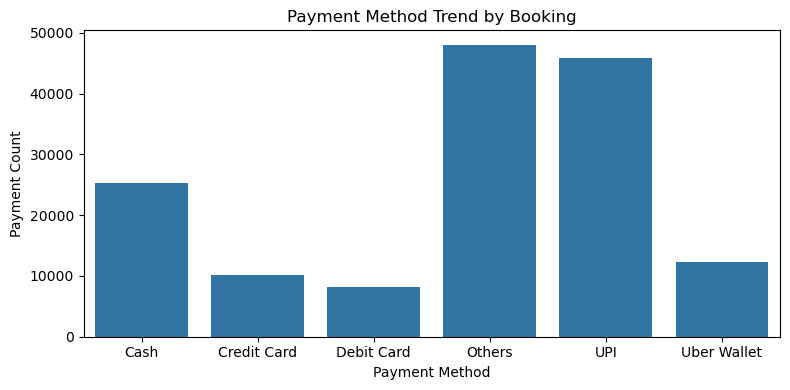

In [2047]:
#Payment method vs number of rides
plt.figure(figsize=(8,4))

pay_method=df.groupby('payment_method').size()
sns.barplot(x=pay_method.index,y=pay_method.values)
plt.title('Payment Method Trend by Booking')
plt.xlabel('Payment Method')
plt.ylabel('Payment Count')

plt.tight_layout()
plt.show()